#**2. MODELADO DATO TABULARES**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.1


In [6]:
import pandas as pd
import numpy as np

# Cargar el fd_train_finpreprocesado.csv

fd_train_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_finpreprocesado.csv", sep=';')


# Cargar el fd_val_finpreprocesado.csv

fd_val_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_val_finpreprocesado.csv", sep=';')

# Cargar el fd_test_finpreprocesado.csv

fd_test_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_test_finpreprocesado.csv", sep=';')


In [ ]:
#shape de cada conjunto
print("Shape en train:", fd_train_finpreprocesado.shape)
print("Shape en val:", fd_val_finpreprocesado.shape)
print("Shape en test:", fd_test_finpreprocesado.shape)


# Revisar estadísticas básicas
print("Estadísticas de train:", fd_train_finpreprocesado.describe())
print("Estadísticas de val:", fd_val_finpreprocesado.describe())
print("Estadísticas de test:", fd_test_finpreprocesado.describe())


Shape en train: (2125, 36)
Shape en val: (376, 36)
Shape en test: (627, 36)
Estadísticas de train:        host_response_time  host_response_rate  host_acceptance_rate  \
count         2125.000000         2125.000000           2125.000000   
mean             3.751059            0.950816              0.886985   
std              0.588380            0.121952              0.186529   
min              1.000000            0.010000              0.010000   
25%              4.000000            0.970400              0.861911   
50%              4.000000            0.990000              0.970400   
75%              4.000000            0.990000              0.990000   
max              4.000000            0.990000              0.990000   

       host_is_superhost  host_total_listings_count  host_has_profile_pic  \
count        2125.000000                2125.000000           2125.000000   
mean            0.328941                   0.364451              0.988706   
std             0.469939      

##**División en variables predictoras**
**Columna objetivo: 'price_log'**

In [8]:
# Dividir el conjunto de entrenamiento en X_train e y_train
X_train = fd_train_finpreprocesado.drop('price_log', axis=1)  # Elimina la columna objetivo para X
y_train = fd_train_finpreprocesado['price_log']              # Selecciona la columna objetivo para y

# Dividir el conjunto de validación en X_val e y_val
X_val = fd_val_finpreprocesado.drop('price_log', axis=1)
y_val = fd_val_finpreprocesado['price_log']

# Dividir el conjunto de prueba en X_test e y_test
X_test = fd_test_finpreprocesado.drop('price_log', axis=1)
y_test = fd_test_finpreprocesado['price_log']

# Verificar las dimensiones para asegurarse de que todo esté correcto
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de X_val:", X_val.shape)
print("Dimensiones de y_val:", y_val.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (2125, 35)
Dimensiones de y_train: (2125,)
Dimensiones de X_val: (376, 35)
Dimensiones de y_val: (376,)
Dimensiones de X_test: (627, 35)
Dimensiones de y_test: (627,)


# **a.c.d.e. Desarrollar red neuronal desde 0 Dense**

**Arquitectura de la Red**

*Capa de entrada (input_dim):*
Tomará el tamaño del vector de entrada (número de columnas en X_train).
Necesario para que la red sepa cuántas características va a procesar.
Capas ocultas Dense:

*1ra capa oculta:*
64 neuronas, activación relu (corrige no linealidades y evita problemas con activación sigmoid o tanh).

*2da capa oculta*: 32 neuronas, también con activación relu.

Regularización con Dropout para reducir overfitting, desactivando aleatoriamente neuronas durante el entrenamiento.

*Capa de salida:*
1 neurona, activación linear porque la tarea es de regresión (predicción continua del precio).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Tamaño del vector de entrada
input_dim = X_train.shape[1]

# Definir la arquitectura del modelo con nombre
model = Sequential(name="Modelo_Tabular", layers=[
    Input(shape=(input_dim,)),             # Define explícitamente el tamaño de entrada
    Dense(64, activation='relu'),          # 1ra capa oculta
    Dropout(0.2),                          # Regularización Dropout
    Dense(32, activation='relu'),          # 2da capa oculta
    Dropout(0.2),                          # Regularización Dropout
    Dense(1, activation='linear')          # Capa de salida (regresión)
])

# Revisar el modelo
model.summary()


Model: "Modelo_Tabular"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

**Learning Rate Finder**

Quiero implementar el *Learning Rate Finder* para identificar un rango óptimo para la tasa de aprendizaje antes de entrenar completamente el modelo. Esto lo haré  usando el callback especial que lo va ajustando durante el entrenamiento.

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback

# Callback para explorar el lr
class LearningRateFinder(Callback):
    def __init__(self, min_lr=1e-6, max_lr=1, steps=100):
        super().__init__()
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.steps = steps
        self.lr_rates = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        # Ajustar el lr exponencialmente
        lr = self.min_lr * (self.max_lr / self.min_lr) ** (len(self.losses) / self.steps)
        self.model.optimizer.learning_rate = lr  # Ajustar directamente lr
        self.lr_rates.append(lr)
        self.losses.append(logs["loss"])

    def plot(self):
        # Graficar la pérdida en función del lr
        plt.figure(figsize=(10, 6))
        plt.plot(self.lr_rates, self.losses)
        plt.xscale("log")
        plt.xlabel("Learning Rate")
        plt.ylabel("Loss")
        plt.title("Learning Rate Finder")
        plt.show()


## **Compilación del Modelo**

*Optimizador (Adam):*
Ajustará los pesos de la red para minimizar el error.

*Función de pérdida (mse):*
Error cuadrático medio para este problema de regresión.

*Métricas (mae):*
Error absoluto medio, usa la misma escala que la variable objetivo 'price_log'


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compilar el modelo con un lr inicial bajo
model.compile(
    optimizer=Adam(learning_rate=1e-6),
    loss='mse',
    metrics=['mae']
)


##Exploracion del lr

In [ ]:
# Configuración de entrenamiento
batch_size = 32
steps_per_epoch = len(X_train) // batch_size  # Número limitado de pasos por época


In [ ]:
# Instanciar el Learning Rate Finder
lr_finder = LearningRateFinder(min_lr=1e-6, max_lr=1, steps=steps_per_epoch)

# Entrenar durante unas pocas iteraciones para explorar el lr
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=1,  # Solo una época
    steps_per_epoch=steps_per_epoch,  # Número limitado de pasos
    callbacks=[lr_finder],
    verbose=1
)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.6046 - mae: 3.2417


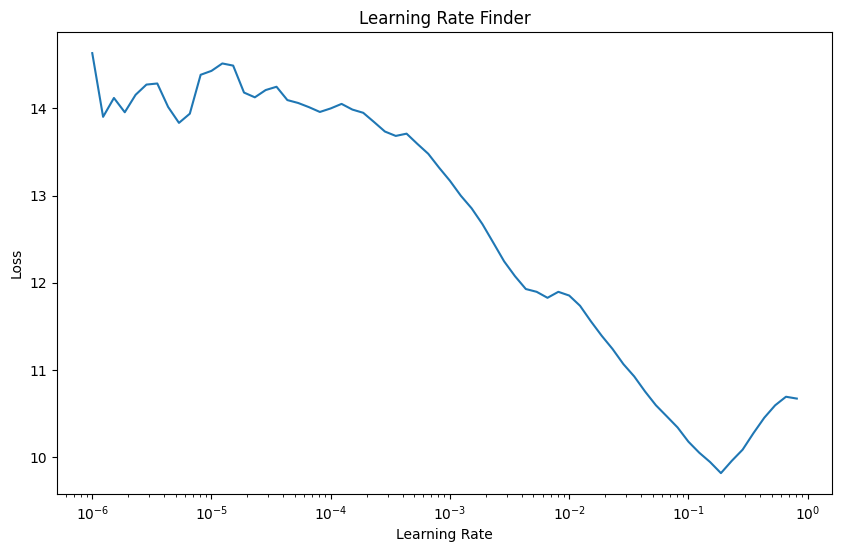

In [ ]:
# Visualizar los resultados del Learning Rate Finder
lr_finder.plot()



**Región clave del learning rate:**

Región inicial (10^-6 a 10^-5): La pérdida fluctúa mucho y no hay un patrón claro. Demasiado bajos para un entrenamiento estable.

Región intermedia (10^-5 a 10^-4): La pérdida muestra un descenso más constante,rango adecuado. 5×10−3 parece ser un valor interesante porque la pérdida está bien estabilizada antes de que comience a aumentar.

Región final (cerca de 10^-2):la pérdida empieza a fluctuar nuevamente e incluso aumenta. lr demasiado altos, lo que podría causar que el modelo diverja.

Basándome en la gráfica, un buen punto de partida para el learning rate sería alrededor de 1e-4 o un poco menor (5e-3), donde la pérdida muestra una reducción constante sin demasiada variabilidad.

**COMPILAR NUEVAMENTE CON DIFERENTE lr: 5e-3**

In [ ]:
from tensorflow.keras.optimizers import Adam

# Actualizar el compilador con el nuevo lr
model.compile(
    optimizer=Adam(learning_rate=5e-3),  # Learning rate ajustado
    loss='mse',
    metrics=['mae']
)

print("El modelo ha sido recompilado con un learning rate de 5e-3.")


El modelo ha sido recompilado con un learning rate de 5e-3.


Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 392.4494 - mae: 14.9941 - val_loss: 15.1927 - val_mae: 3.7126
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.2943 - mae: 3.4044 - val_loss: 9.5515 - val_mae: 2.8609
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.5597 - mae: 3.1240 - val_loss: 8.4750 - val_mae: 2.6660
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.7137 - mae: 2.9112 - val_loss: 4.8504 - val_mae: 2.0436
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8880 - mae: 1.8835 - val_loss: 1.7567 - val_mae: 1.1315
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6415 - mae: 1.3979 - val_loss: 1.6479 - val_mae: 1.0957
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4927 - mae: 1.3869 - val_loss: 1.4705 - val_mae: 1.0314
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5928 - mae: 1.3809 - val_loss: 1.2615 - val_mae: 0.9447
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2392 

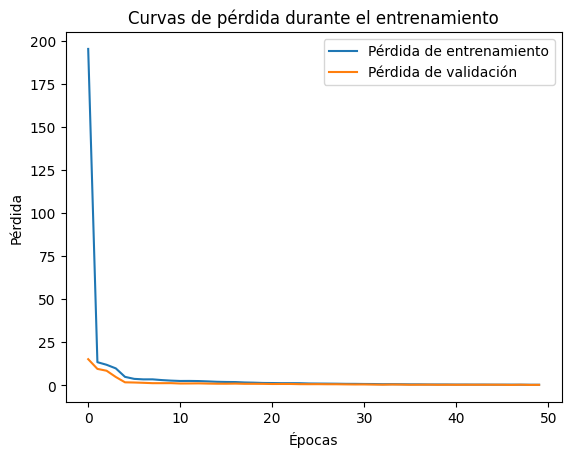

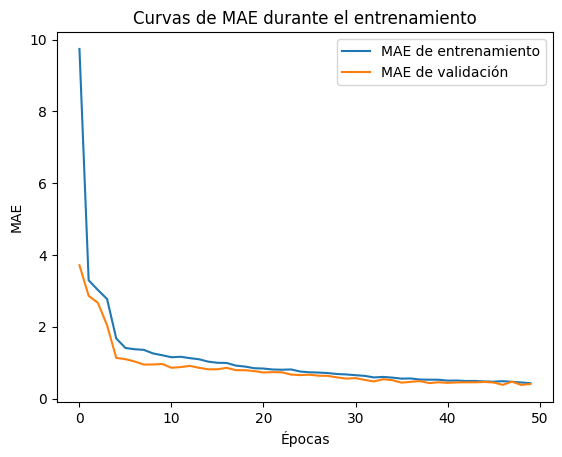

In [ ]:
import matplotlib.pyplot as plt

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,  # Puedes ajustar el tamaño del batch según tu memoria disponible
    epochs=50,  # Número de épocas para entrenar
    verbose=1
)

# Graficar las curvas de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curvas de pérdida durante el entrenamiento')
plt.legend()
plt.show()

# Graficar las curvas de MAE
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.title('Curvas de MAE durante el entrenamiento')
plt.legend()
plt.show()


**Curva de pérdida:**

*Consistencia:* Las curvas de pérdida para entrenamiento y validación muestran una caída rápida y luego se estabilizan cerca de 0, lo cual indica una buena convergencia.

*Generalización:* No hay una diferencia significativa entre las pérdidas de entrenamiento y validación, lo que sugiere que el modelo no está sobreajustando.


**Curva de MAE (Mean Absolute Error):**

*Tendencia decreciente:* El MAE baja consistentemente en ambas curvas, lo que confirma que el modelo está aprendiendo a minimizar el error absoluto.

*Validación más baja inicialmente:* La MAE de validación está ligeramente por debajo de la de entrenamiento en las primeras épocas, pero convergen hacia el mismo valor. Esto es un buen indicador de estabilidad.

In [ ]:
# Guardar el modelo entrenado
model.save('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/best_model_lr.keras')

print("Modelo guardado correctamente.")


Modelo guardado correctamente.


#**Evaluación del modelo en Test**

In [ ]:
# Evaluar el modelo en el conjunto de test
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Mostrar las métricas de evaluación
print(f"Pérdida en test: {test_loss:.4f}")
print(f"MAE en test: {test_mae:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2824 - mae: 0.4081 
Pérdida en test: 0.2908
MAE en test: 0.4116


Pérdida (Loss): 0.2908
Esto representa el error general del modelo en la predicción de price_log. Una pérdida baja indica que el modelo está bien ajustado a los datos de test.

Entrenamiento: 0.2824
Validación: 0.2908

La pérdida es muy similar entre entrenamiento y validación, lo cual es positivo, ya que indica que el modelo no está sobreajustando ni subajustando. La generalización hacia datos no vistos (val) es consistente.

MAE (Mean Absolute Error): 0.4116
Esto indica que, en promedio, las predicciones del modelo tienen un error absoluto de 0.4116 unidades logarítmicas.

Este valor es bajo considerando que la escala de los datos está alrededor de los valores logarítmicos (entre 4 y 7) el error absoluto promedio es menos del 10% marcando un buen desempeño general.

In [ ]:
# Realizar predicciones en el conjunto de test
y_pred = model.predict(X_test)

# Mostrar algunas predicciones y sus valores reales
for i in range(10):  # Mostrar las primeras 10 predicciones
    print(f"Predicción: {y_pred[i][0]:.4f} | Real: {y_test[i]:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predicción: 4.8978 | Real: 5.0106
Predicción: 4.9011 | Real: 5.3033
Predicción: 4.6377 | Real: 5.0304
Predicción: 4.8827 | Real: 4.7005
Predicción: 4.9283 | Real: 5.0370
Predicción: 4.5457 | Real: 4.8598
Predicción: 4.7875 | Real: 3.9120
Predicción: 4.2691 | Real: 4.3041
Predicción: 4.3514 | Real: 4.9127
Predicción: 4.7789 | Real: 5.0999


Errores pequeños:
La mayoría de las predicciones están cerca de los valores reales.

Predicción: 4.8978 | Real: 5.0106
Predicción: 4.9283 | Real: 5.0370

Errores más significativos:
Algunos casos muestran diferencias mayores:

Predicción: 4.7875 | Real: 3.9120
Predicción: 4.3514 | Real: 4.9127



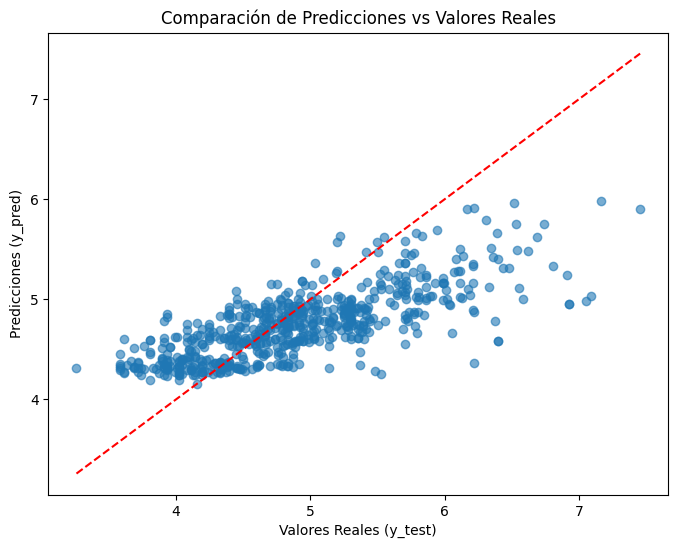

In [ ]:
import matplotlib.pyplot as plt

# Comparar gráficamente predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de Predicciones vs Valores Reales")
plt.show()


**Distribución general:**

La mayoría de los puntos se agrupan cerca de la línea ideal, lo que indica que el modelo está realizando buenas predicciones en la mayoría de los casos.

**Tendencias:**

Para valores reales más bajos (entre 4 y 5), las predicciones tienden a concentrarse mejor alrededor de la línea.

Para valores más altos (mayores a 6), hay una mayor dispersión, lo que indica que el modelo podría tener dificultades para capturar las relaciones en esta región.

#**Evaluar con Métricas Complementarias**

**Añadir R²:** Sabré qué % de la variabilidad de los precios está explicando el modelo.

**MAPE (Mean Absolute Percentage Error):** para evaluar errores relativos en lugar de absolutos.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test).flatten()

# Calcular R²
r2 = r2_score(y_test, y_pred)
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

# Calcular MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE (Mean Absolute Percentage Error): {mape:.4%}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R² (Coeficiente de Determinación): 0.4453
MAPE (Mean Absolute Percentage Error): 8.1625%


**Análisis de las métricas obtenidas
R² (0.4453):**

El modelo explica el 44.53% de la variabilidad de los datos de prueba, tiene margen para mejorar en capturar más patrones en los datos.

**MAPE (8.1625%):**

Menor al 10% es generalmente considerado bueno para tareas prácticas.El modelo tiene una precisión decente en las predicciones y no está produciendo errores significativos en términos relativos.

#**Prevención del Overfitting**
Modificaré la arquitectura del modelo para incluir:

**Dropout:** Para evitar que el modelo dependa demasiado de ciertos nodos.

**Regularización L2:** Para penalizar pesos grandes.

In [ ]:
from tensorflow.keras import layers, regularizers

# Crear una nueva arquitectura con Dropout y L2
model = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Tamaño de entrada según las features
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),  # 20% de Dropout
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),  # 20% de Dropout
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),  # 20% de Dropout
    layers.Dense(1)  # Salida para regresión
])

print("Modelo actualizado con Dropout y L2 Regularization.")


Modelo actualizado con Dropout y L2 Regularization.


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compilar el modelo actualizado
model.compile(
    optimizer=Adam(learning_rate=5e-3),  # mismo lr optimo que tenia
    loss='mse',
    metrics=['mae']
)

print("Modelo compilado con las nuevas regularizaciones.")


Modelo compilado con las nuevas regularizaciones.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callback para guardar el mejor modelo
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_with_regularization.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Callback para Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Entrenar el modelo actualizado
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=100,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

print("Modelo entrenado con regularización.")


Epoch 1/100
54/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4166 - mae: 1.5413
Epoch 1: val_loss improved from inf to 1.23179, saving model to /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_with_regularization.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 5.0233 - mae: 1.4674 - val_loss: 1.2318 - val_mae: 0.4698
Epoch 2/100
64/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0176 - mae: 0.8786
Epoch 2: val_loss improved from 1.23179 to 1.01224, saving model to /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_with_regularization.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0095 - mae: 0.8772 - val_loss: 1.0122 - val_mae: 0.4911
Epoch 3/100
60/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5977 - mae: 0.8035
Epoch 3: val_loss improved from 1.01224 to 0.95004, saving model to /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_with_regularization.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5969 - mae: 

El modelo ha guardado los pesos en el mejor punto del entrenamiento (epoch 46)

##**Visualizaré si hay evolución de loss y MAE:**

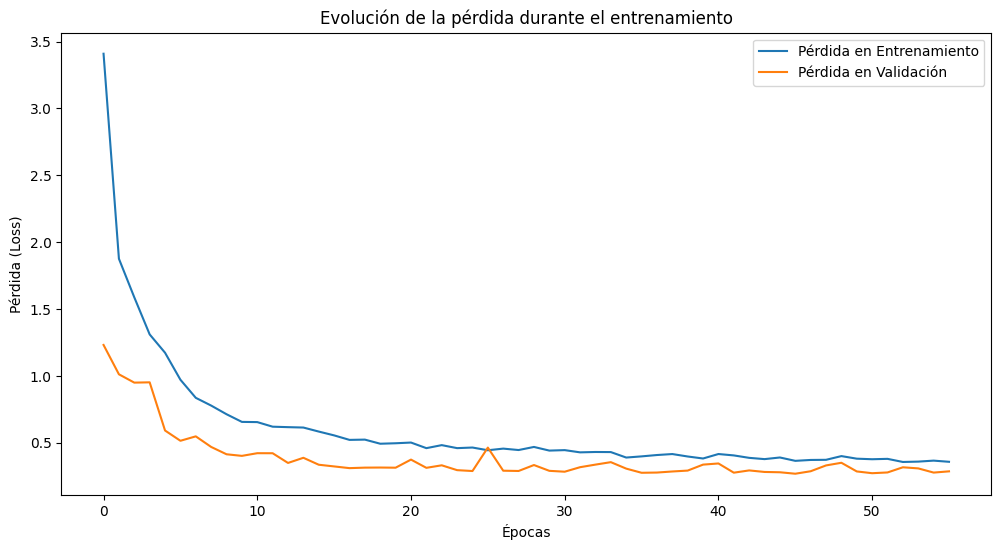

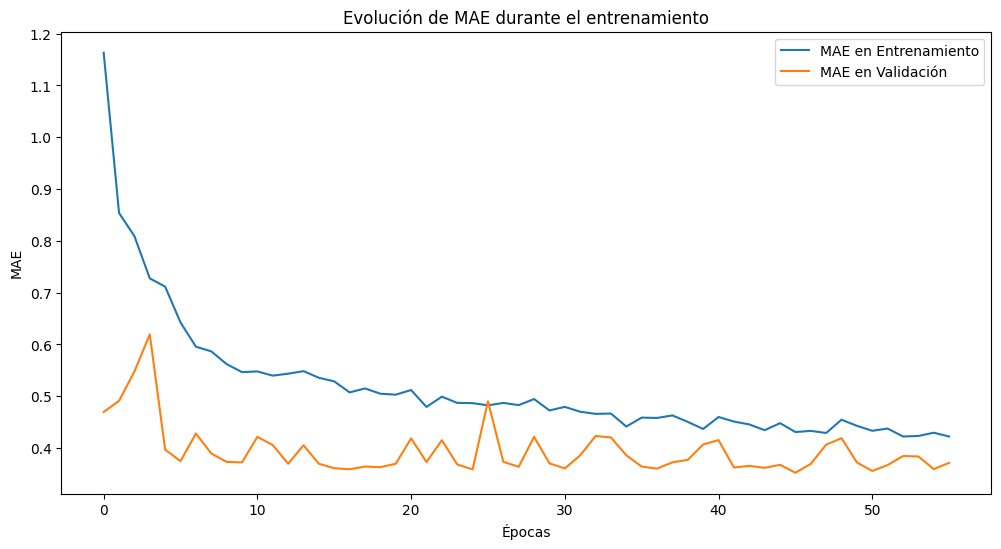

In [ ]:
import matplotlib.pyplot as plt

# Obtener datos del entrenamiento
history_dict = history.history

# Gráficas de pérdida
plt.figure(figsize=(12, 6))
plt.plot(history_dict['loss'], label='Pérdida en Entrenamiento')
plt.plot(history_dict['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()

# Gráficas de MAE
plt.figure(figsize=(12, 6))
plt.plot(history_dict['mae'], label='MAE en Entrenamiento')
plt.plot(history_dict['val_mae'], label='MAE en Validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.title('Evolución de MAE durante el entrenamiento')
plt.show()


#**Análisis de la gráfica después de regularización**
Mejora tras la regularización, curvas mas cercanas entre si.

##**Pérdida en entrenamiento:**

La curva desciende de manera constante y alcanza un punto de estabilización alrededor de las últimas épocas, el modelo está aprendiendo gradualmente.

**Pérdida en validación:**

La pérdida de validación sigue un comportamiento similar a la del entrenamiento, lo que indica que la regularización (dropout y L2) ha prevenido el overfitting.

**Cercanía entre ambas curvas:**

Al mantenerse cercanas, el modelo muestra que no está memorizando el conjunto de entrenamiento, sino generalizando mejor a los datos de validación.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


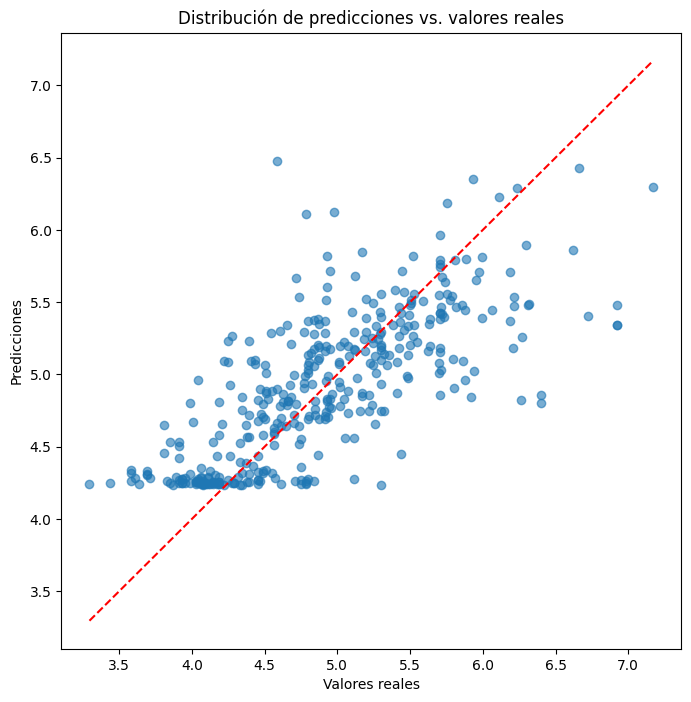

In [ ]:
import numpy as np

# Generar predicciones en el conjunto de validación
y_pred = model.predict(X_val)

# Comparar predicciones y valores reales
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Línea ideal
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Distribución de predicciones vs. valores reales')
plt.show()


#**Análisis de la distribución después de regularización**

La mayoría de los puntos siguen la línea roja, lo que indica que el modelo está prediciendo correctamente para gran parte de los datos.

**Sesgo en las predicciones:**

Se observa un ligero agrupamiento de puntos por debajo de la línea en valores bajos (aproximadamente entre 3.5 y 4.5), el modelo puede estar subestimando los valores reales en esa región.

**Rango de predicciones:**

El modelo parece ajustarse bien en el rango medio de los valores reales, pero hay una dispersión creciente en los extremos, especialmente en los valores altos.

**Errores notables:**

Hay varios puntos alejados de la línea ideal (outliers), lo que puede indicar casos en los que el modelo no generaliza bien.

## **Reevaluemos en Test:**

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2588 - mae: 0.3587 
Pérdida en test: 0.27264779806137085
MAE en test: 0.37188720703125
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


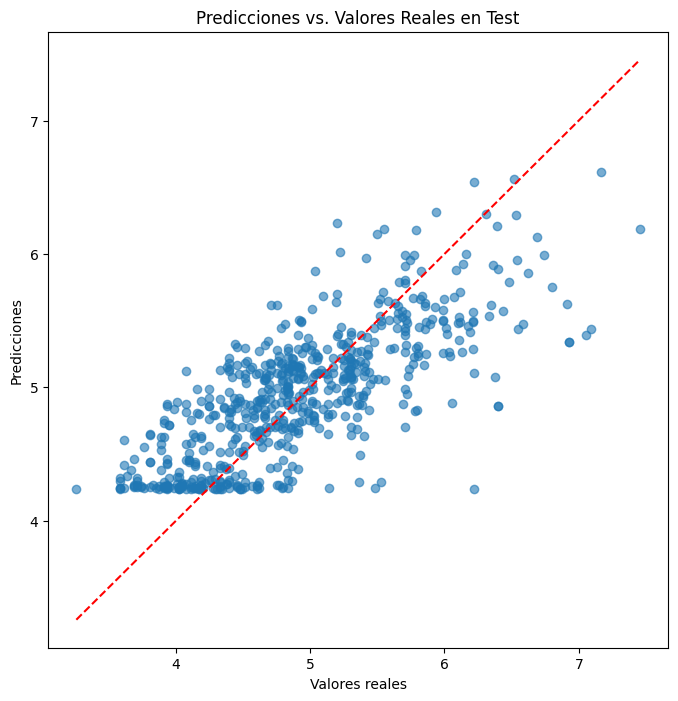

In [ ]:
# Evaluación en test
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Pérdida en test: {test_loss}")
print(f"MAE en test: {test_mae}")

# Predicciones en test
y_pred_test = model.predict(X_test)

# Visualización predicciones vs. reales
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales en Test')
plt.show()


# **Evaluación de los resultados obtenidos:**

##Gráfica de predicciones vs. valores reales

La gráfica muestra que las predicciones están cerca de la línea diagonal.
pero hay cierta dispersión en los valores más altos (posible menor precisión en precios altos).

Métricas reportadas:

Pérdida (Loss): 0.2588 en test, una mejora notable.

MAE (Error Absoluto Medio): 0.3718, un error promedio bajo en las predicciones.

##**REEVALUEMOS MÉTRICAS GLOBALES:**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


R²: 0.5687
MAPE: 7.68%


## **Análisis**

**R² (Coeficiente de determinación): 0.5687**

El 57% de la varianza en los datos reales está explicada por el modelo.
Aceptable si los datos tienen cierta complejidad o ruido.

**MAPE (Mean Absolute Percentage Error): 7.68%**

Esto significa que el modelo tiene un error promedio del 7.68% en sus predicciones respecto a los valores reales, el modelo está haciendo predicciones precisas.

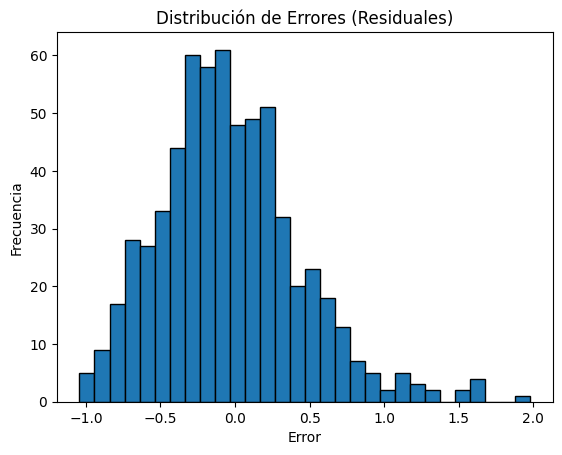

In [ ]:
import matplotlib.pyplot as plt

errores = y_test - y_pred

plt.hist(errores, bins=30, edgecolor='black')
plt.title("Distribución de Errores (Residuales)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()


## **Análisis de distribucion de errores:**

El modelo está generalizando bien, los errores no muestran un patrón claro o un sesgo hacia valores positivos o negativos.

La forma simétrica muestra que el modelo no tiene un sesgo direccional.

Outliers Superiores (Errores más grandes positivos):
       y_real    y_pred  error_residual
25   5.796058  4.826765        0.969293
43   5.780744  4.825503        0.955240
68   6.216606  4.236667        1.979939
69   5.141664  4.245464        0.896199
85   6.586172  5.471626        1.114546
124  6.040255  5.232978        0.807277
126  5.370638  4.489733        0.880905
128  7.090910  5.434629        1.656281
154  5.690359  4.877338        0.813022
169  5.720312  4.948322        0.771990
174  5.484797  4.245653        1.239144
192  6.621406  5.854519        0.766886
199  6.216606  5.110108        1.106498
219  6.437752  5.574893        0.862859
223  5.525453  4.291082        1.234371
360  6.398595  4.856448        1.542147
374  6.803505  5.751550        1.051956
377  7.056175  5.390477        1.665699
379  5.707110  4.706292        1.000818
393  6.373320  5.074436        1.298884
403  7.455877  6.183898        1.271978
448  6.054439  4.881714        1.172725
452  6.333280  5.531629    

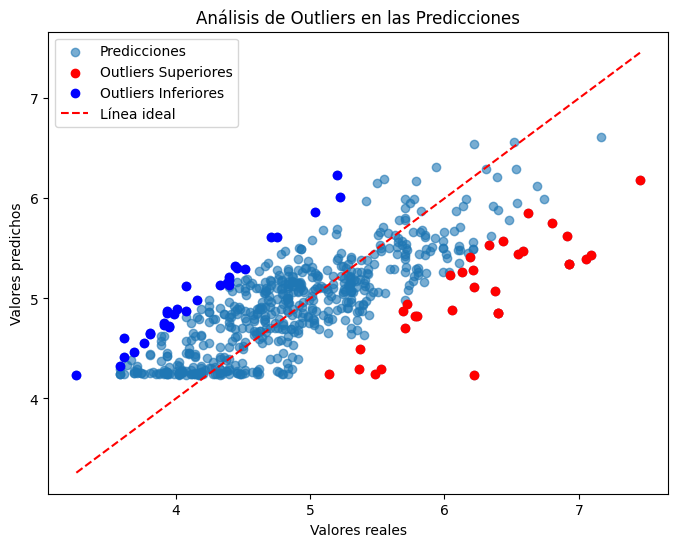

In [ ]:
import pandas as pd
import numpy as np

# Calcular los errores residuales
errores_residuales = y_test - y_pred

# Convertir los datos a un DataFrame para facilitar la inspección
df_outliers = pd.DataFrame({
    'y_real': y_test,
    'y_pred': y_pred,
    'error_residual': errores_residuales
})

# Identificar los outliers como los mayores errores positivos y negativos
percentil_95 = np.percentile(errores_residuales, 95)
percentil_5 = np.percentile(errores_residuales, 5)

outliers_superiores = df_outliers[df_outliers['error_residual'] > percentil_95]
outliers_inferiores = df_outliers[df_outliers['error_residual'] < percentil_5]

# Mostrar resultados
print("Outliers Superiores (Errores más grandes positivos):")
print(outliers_superiores)

print("\nOutliers Inferiores (Errores más grandes negativos):")
print(outliers_inferiores)

# Export de CSV para análisis más profundo
df_outliers.to_csv('errores_residuales_con_outliers.csv', index=False)

# Gráfica de outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_outliers['y_real'], df_outliers['y_pred'], alpha=0.6, label='Predicciones')
plt.scatter(outliers_superiores['y_real'], outliers_superiores['y_pred'], color='red', label='Outliers Superiores')
plt.scatter(outliers_inferiores['y_real'], outliers_inferiores['y_pred'], color='blue', label='Outliers Inferiores')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea ideal')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Análisis de Outliers en las Predicciones')
plt.legend()
plt.show()


Los outliers superiores (rojos) y los inferiores (azules) se distribuyen en diferentes áreas del gráfico, lo que podría indicar patrones específicos en el comportamiento del modelo.

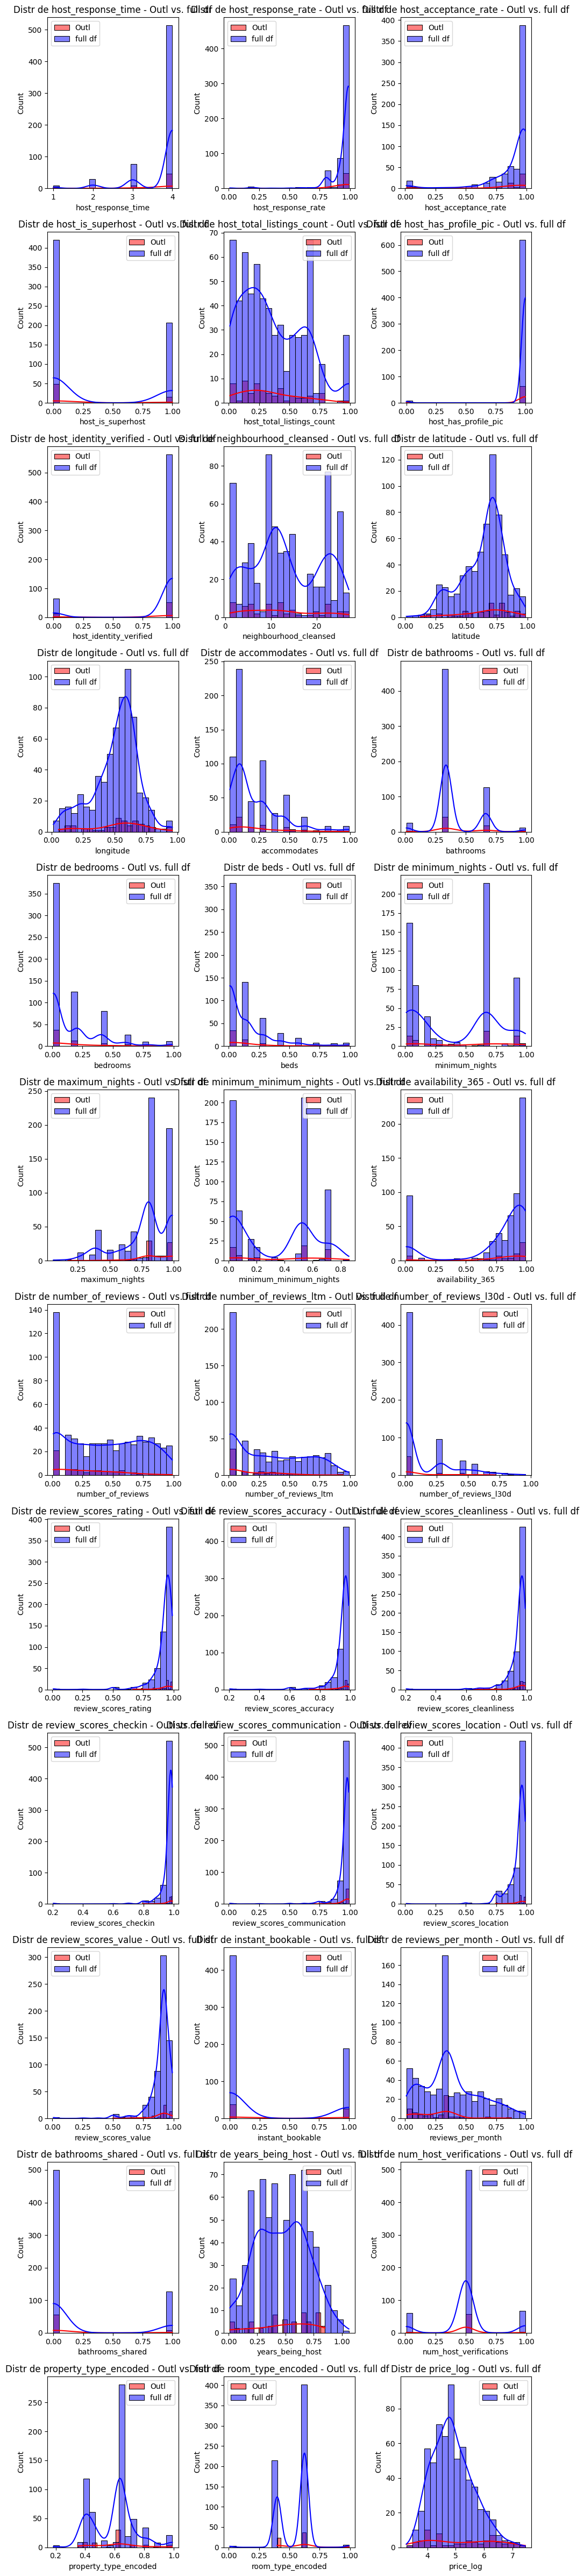

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables numéricas para los outliers
numeric_cols = outliers_data.select_dtypes(include=['float64', 'int64']).columns

import matplotlib.pyplot as plt
import seaborn as sns

# Definir el número de filas y columnas para los subplots
n_cols = 3  # Número de columnas
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calcular filas necesarias

# Crear figura y ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Graficar cada columna en un subplot
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(outliers_data[col], kde=True, bins=20, color='red', label='Outl', ax=ax)
    sns.histplot(fd_test_finpreprocesado[col], kde=True, bins=20, color='blue', alpha=0.5, label='full df', ax=ax)
    ax.set_title(f"Distr de {col} - Outl vs. full df")
    ax.legend()

# Eliminar los subplots vacíos si hay menos columnas que subplots creados
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

# Ajustar los espacios entre subplots
plt.tight_layout()
plt.show()


#**Optimización de hiperparametros**

Crearé una función que permita a Keras Tuner ajustar automáticamente los hiperparámetros, como el número de capas, neuronas, tasas de dropout, regularización L2, etc.

In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras import layers, models, regularizers
import keras_tuner as kt

def build_model(hp):
    model = models.Sequential()

    # Capa de entrada
    model.add(layers.Input(shape=(X_train.shape[1],)))

    # Capas ocultas ajustables
    for i in range(hp.Int('num_layers', 2, 5)):  # De 2 a 5 capas
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),  # De 32 a 256 neuronas
            activation=hp.Choice('activation', values=['relu', 'tanh']),
            kernel_regularizer=regularizers.l2(hp.Float('l2', 1e-4, 1e-2, sampling='log'))
        ))
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))  # Dropout de 0.1 a 0.5

    # Capa de salida
    model.add(layers.Dense(1, activation='linear'))

    # Compilación del modelo
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='mse',
        metrics=['mae']
    )

    return model


## **Configuración de Keras Tuner**

In [ ]:
from kerastuner.tuners import Hyperband

# Configurar el tuner con Hyperband
tuner = Hyperband(
    build_model,  # Función definida previamente
    objective='val_loss',  # Optimizar la pérdida en validación
    max_epochs=50,  # Número máximo de épocas por modelo
    factor=3,  # Factor de reducción en cada iteración
    directory='/content/drive/MyDrive/Deep_Learning_2024/Notebooks/tuner',  # Carpeta para guardar resultados
    project_name='hyperparameter_optimization'
)

# Resumen de la búsqueda
tuner.search_space_summary()

# Iniciar la búsqueda de los mejores hiperparámetros
tuner.search(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

# Mostrar los mejores hiperparámetros encontrados
tuner.results_summary()


Trial 90 Complete [00h 00m 12s]
val_loss: 0.7016130089759827

Best val_loss So Far: 0.22081825137138367
Total elapsed time: 00h 10m 10s
Results summary
Results in /content/drive/MyDrive/Deep_Learning_2024/Notebooks/tuner/hyperparameter_optimization
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0050 summary
Hyperparameters:
num_layers: 2
units_0: 256
activation: tanh
l2: 0.00013437185489870095
dropout_0: 0.1
units_1: 192
dropout_1: 0.1
optimizer: adam
units_2: 64
dropout_2: 0.30000000000000004
units_3: 128
dropout_3: 0.2
units_4: 128
dropout_4: 0.5
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0046
Score: 0.22081825137138367

Trial 0051 summary
Hyperparameters:
num_layers: 2
units_0: 192
activation: tanh
l2: 0.00013521425127519483
dropout_0: 0.5
units_1: 128
dropout_1: 0.1
optimizer: adam
units_2: 32
dropout_2: 0.1
units_3: 160
dropout_3: 0.1
units_4: 256
dropout_4: 0.4
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/

## **Obtener los mejores Hiperparámetros**

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Mejor número de capas ocultas: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Neurons en la capa {i+1}: {best_hps.get(f'units_{i}')}")
print(f"Mejor función de activación: {best_hps.get('activation')}")
print(f"Mejor regularización L2: {best_hps.get('l2')}")
print(f"Mejor tasa de dropout: {[best_hps.get(f'dropout_{i}') for i in range(best_hps.get('num_layers'))]}")
print(f"Mejor optimizador: {best_hps.get('optimizer')}")


Mejor número de capas ocultas: 2
Neurons en la capa 1: 256
Neurons en la capa 2: 192
Mejor función de activación: tanh
Mejor regularización L2: 0.00013437185489870095
Mejor tasa de dropout: [0.1, 0.1]
Mejor optimizador: adam


## **Construir el Modelo con los Mejores Hiperparámetros del trial**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Mejores hiperparámetros del tuner
best_hyperparameters = {
    'num_layers': 2,
    'units_0': 256,
    'units_1': 192,
    'activation': 'tanh',
    'l2': 0.00013437185489870095,
    'dropout_0': 0.1,
    'dropout_1': 0.1,
    'optimizer': 'adam',
}

# Reconstruir el modelo
model = Sequential()

# Primera capa oculta
model.add(Dense(
    units=best_hyperparameters['units_0'],
    activation=best_hyperparameters['activation'],
    kernel_regularizer=l2(best_hyperparameters['l2']),
    input_shape=(X_train.shape[1],)  # Tamaño de las características de entrada
))
model.add(Dropout(best_hyperparameters['dropout_0']))

# Segunda capa oculta
model.add(Dense(
    units=best_hyperparameters['units_1'],
    activation=best_hyperparameters['activation'],
    kernel_regularizer=l2(best_hyperparameters['l2']),
))
model.add(Dropout(best_hyperparameters['dropout_1']))

# Capa de salida
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(
    optimizer=Adam(),
    loss='mse',
    metrics=['mae']
)

print("Modelo construido con los mejores hiperparámetros.")


Modelo construido con los mejores hiperparámetros.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Entrenar el Modelo con los Mejores Hiperparámetros del trial**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Configuración para guardar el mejor modelo
checkpoint_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_best_hyperparams.keras"
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Detener el entrenamiento si no mejora
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=100,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

print(f"Entrenamiento completado. El mejor modelo se guardó en: {checkpoint_path}")


Epoch 1/100
53/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3560 - mae: 1.9948
Epoch 1: val_loss improved from inf to 0.42337, saving model to /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_best_hyperparams.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.2964 - mae: 1.7950 - val_loss: 0.4234 - val_mae: 0.4944
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5598 - mae: 0.5595
Epoch 2: val_loss improved from 0.42337 to 0.32614, saving model to /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_best_hyperparams.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5597 - mae: 0.5595 - val_loss: 0.3261 - val_mae: 0.4143
Epoch 3/100
61/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4581 - mae: 0.5005
Epoch 3: val_loss improved from 0.32614 to 0.32199, saving model to /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_best_hyperparams.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4597 - mae: 0.5013 - v

## **Evaluar el modelo final en el conjunto de prueba**

In [ ]:
# Cargar el mejor modelo guardado
from tensorflow.keras.models import load_model

final_model = load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_best_hyperparams.keras")

# Evaluar en el conjunto de prueba
test_loss, test_mae = final_model.evaluate(X_test, y_test, verbose=1)

print(f"Pérdida en test: {test_loss}")
print(f"MAE en test: {test_mae}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2142 - mae: 0.3292  
Pérdida en test: 0.21514688432216644
MAE en test: 0.3335416615009308


**Pérdida en Test:**
Es baja, el modelo está realizando predicciones cercanas a los valores reales. Esto es consistente con el rendimiento observado en la etapa de validación.

**MAE:**
En promedio, el modelo tiene un error absoluto de aproximadamente 0.33 unidades en la escala log-transformada de los precios.

## **Calcularé métricas globales con este modelo hp**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Realizar predicciones en el conjunto de prueba
y_pred = final_model.predict(X_test).flatten()

# Calcular R² y MAPE
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R²: 0.6381
MAPE: 6.80%


R²:
El modelo explica aproximadamente el 63.81% de la variabilidad de los datos del conjunto de prueba.

MAPE:
En promedio, las predicciones tienen un error del 6.80% en relación con los valores reales. Buen resultado, muestra que el modelo generaliza bien.

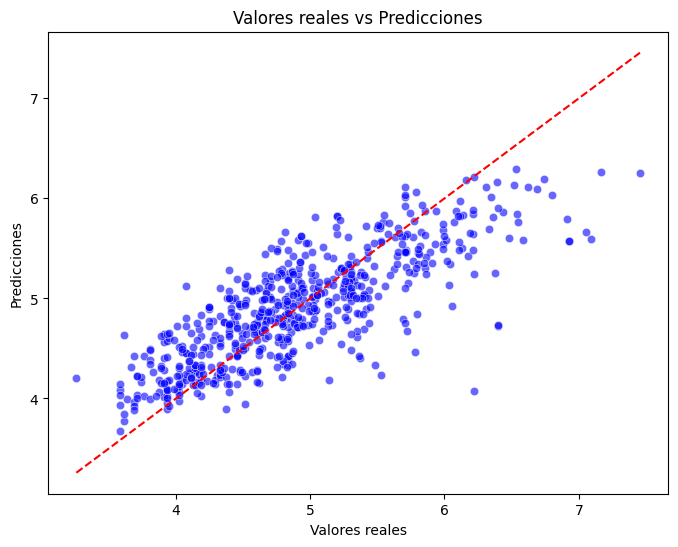

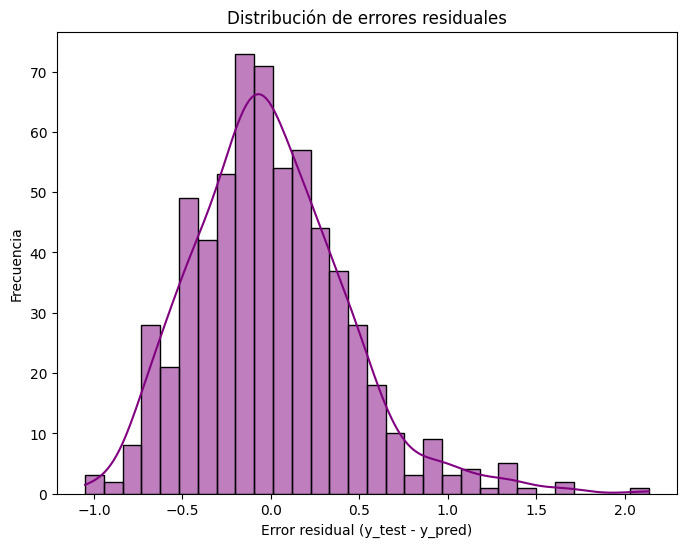

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de valores reales vs predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.title("Valores reales vs Predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

# Gráfico de errores residuales
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.title("Distribución de errores residuales")
plt.xlabel("Error residual (y_test - y_pred)")
plt.ylabel("Frecuencia")
plt.show()


La gráfica muestra una relación positiva clara entre los valores reales y las predicciones, está funcionando adecuadamente. Sin embargo, sigue la dispersión en algunos puntos, especialmente lejos de la línea roja, lo que indica errores más significativos para ciertos datos.


**Uniformidad: **

No parece haber un sesgo claro; los errores se distribuyen tanto por encima como por debajo de la línea.


# **Implementación de Ensambles**

Usaré el modelo ya entrenado y un par de modelos adicionales con ligeras modificaciones para hacer un ensamble de promedio simple.

## **Crear variantes de modelos**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Crear modelo variante 1
def create_model_variant_1():
    model = Sequential([
        Dense(256, activation='tanh', input_shape=(X_train.shape[1],)),
        Dropout(0.1),
        Dense(192, activation='tanh', kernel_regularizer=l2(0.0001)),
        Dropout(0.1),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=5e-3), loss='mse', metrics=['mae'])
    return model

# Crear modelo variante 2
def create_model_variant_2():
    model = Sequential([
        Dense(160, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(128, activation='relu', kernel_regularizer=l2(0.0002)),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])
    return model

# Inicializar los modelos
model_variant_1 = create_model_variant_1()
model_variant_2 = create_model_variant_2()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Entrenar los modelos variantes**

In [ ]:
# Entrenar modelo variante 1
history_variant_1 = model_variant_1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Entrenar modelo variante 2
history_variant_2 = model_variant_2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.0979 - mae: 1.5548 - val_loss: 0.4613 - val_mae: 0.5319
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5715 - mae: 0.5793 - val_loss: 0.3173 - val_mae: 0.4269
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4473 - mae: 0.5037 - val_loss: 0.2816 - val_mae: 0.3879
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3833 - mae: 0.4621 - val_loss: 0.2856 - val_mae: 0.3852
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3794 - mae: 0.4596 - val_loss: 0.2594 - val_mae: 0.3585
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3527 - mae: 0.4440 - val_loss: 0.2604 - val_mae: 0.3620
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3624 - mae: 0.4498 - val_loss: 0.2813 - val_mae: 0.3739
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3123 - mae: 0.4025 - val_loss: 0.2665 - val_mae: 0.3776
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3381 - mae: 

## **Obtener predicciones de los modelos**

In [ ]:
# Predicciones de cada modelo
y_pred_final_model = final_model.predict(X_test)
y_pred_variant_1 = model_variant_1.predict(X_test)
y_pred_variant_2 = model_variant_2.predict(X_test)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


## **Ensamble por promedio simple**

In [ ]:
import numpy as np

# Promediar las predicciones
y_pred_ensemble = np.mean(
    [y_pred_final_model, y_pred_variant_1, y_pred_variant_2],
    axis=0
)

# Evaluar el ensamble
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"Ensambles - MSE: {mse_ensemble}, MAE: {mae_ensemble}, R²: {r2_ensemble}")


Ensambles - MSE: 0.19084571830956348, MAE: 0.32919196347269614, R²: 0.6360172112712048


 Las predicciones del ensamble están alineadas de manera razonable con los valores reales, lo que es consistente con las métricas que obtuvimos:

MAE: 0.3292

R²: 0.636

**Anterior modelo hp:**

R²: 0.6381

MAPE: 6.80%

Pérdida en test: 0.21514688432216644

MAE en test: 0.3335416615009308

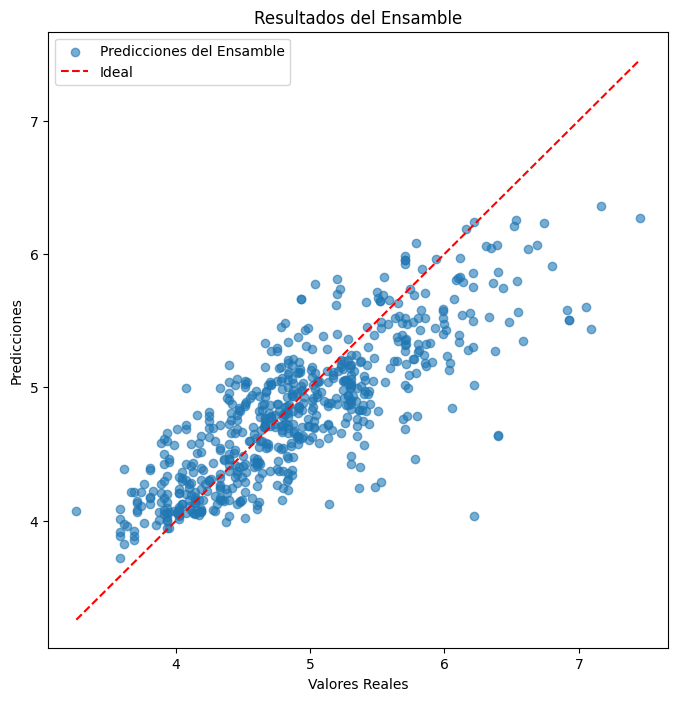

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_ensemble, alpha=0.6, label='Predicciones del Ensamble')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.legend()
plt.title("Resultados del Ensamble")
plt.show()


In [ ]:
import joblib

# Guardar las predicciones del ensamble
joblib.dump(y_pred_ensemble, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/ensemble_predictions.pkl')
print("Predicciones del ensamble guardadas exitosamente.")

# Guardar las métricas del ensamble
ensemble_metrics = {
    'mse': mse_ensemble,
    'mae': mae_ensemble,
    'r2': r2_ensemble
}

joblib.dump(ensemble_metrics, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/ensemble_metrics.pkl')
print("Métricas del ensamble guardadas exitosamente.")




Predicciones del ensamble guardadas exitosamente.
Métricas del ensamble guardadas exitosamente.


## **Stacking para combinar las predicciones de los modelos base en lugar de promediarlas.**

**Cargar los modelos guardados**

In [ ]:
from tensorflow.keras.models import load_model

# Cargar todos los modelos guardados
models = {
    "model_best_hyperparams": load_model('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_best_hyperparams.keras'),
    "model_with_regularization": load_model('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_with_regularization.keras'),
    "best_model_lr": load_model('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/best_model_lr.keras'),
    "best_model": load_model('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/best_model.keras'),
}

# Generar predicciones para cada modelo
predictions_train = []
predictions_test = []

for model_name, model in models.items():
    # Predicciones en conjunto de entrenamiento
    pred_train = model.predict(X_train)
    predictions_train.append(pred_train)

    # Predicciones en conjunto de prueba
    pred_test = model.predict(X_test)
    predictions_test.append(pred_test)

# Crear datasets para el metamodelo (stacking)
X_train_meta = np.hstack(predictions_train)  # Concatenar predicciones de entrenamiento
X_test_meta = np.hstack(predictions_test)    # Concatenar predicciones de prueba


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


## **Diseñar y entrenar la red neuronal como Metamodelo**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Crear el metamodelo (red neuronal simple)
meta_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_meta.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1)  # Salida con una sola neurona para regresión
])

# Compilar el metamodelo
meta_model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

# Entrenar el metamodelo
history = meta_model.fit(X_train_meta, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Guardar el metamodelo
meta_model.save('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/meta_model_stacking_nn.keras')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 10.6441 - mae: 2.8251 - val_loss: 0.3520 - val_mae: 0.4501
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2793 - mae: 0.8717 - val_loss: 0.3588 - val_mae: 0.4556
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8997 - mae: 0.7578 - val_loss: 0.4000 - val_mae: 0.4881
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9531 - mae: 0.7633 - val_loss: 0.2900 - val_mae: 0.3994
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9091 - mae: 0.7453 - val_loss: 0.4259 - val_mae: 0.5082
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8045 - mae: 0.7099 - val_loss: 0.3581 - val_mae: 0.4543
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6652 - mae: 0.6389 - val_loss: 0.2917 - val_mae: 0.4008
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6947 - mae: 0.6434 - val_loss: 0.2804 - val_mae: 0.3917
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6492 - mae: 0.6340 - 

## **Evaluar metamodelo**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicciones del metamodelo
y_pred_meta = meta_model.predict(X_test_meta)

# Calcular métricas
mse_meta = mean_squared_error(y_test, y_pred_meta)
mae_meta = mean_absolute_error(y_test, y_pred_meta)
r2_meta = r2_score(y_test, y_pred_meta)

print(f"Stacking con Red Neuronal - MSE: {mse_meta}, MAE: {mae_meta}, R²: {r2_meta}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Stacking con Red Neuronal - MSE: 0.7346753835297658, MAE: 0.7206902269861679, R²: -0.40117995455264666


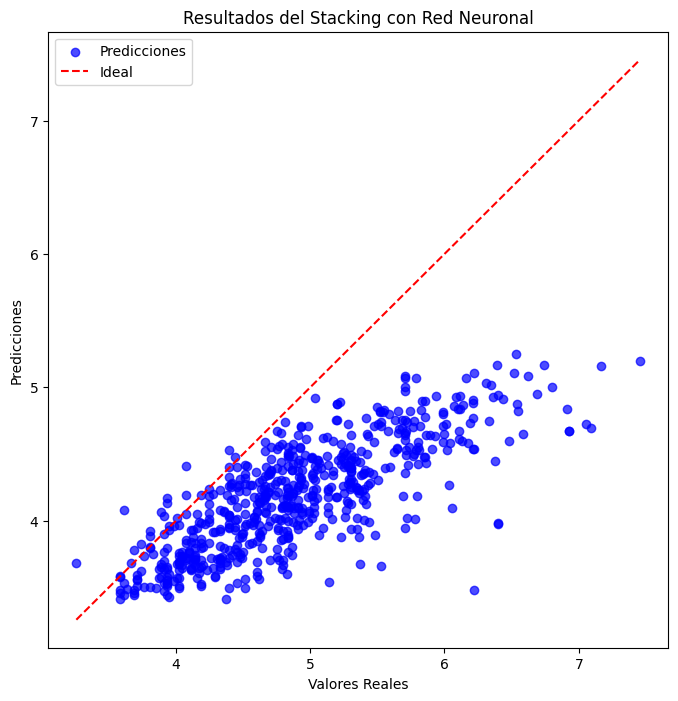

In [ ]:
import matplotlib.pyplot as plt

# Comparación de predicciones vs valores reales
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_meta, alpha=0.7, color="blue", label="Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal")
plt.title("Resultados del Stacking con Red Neuronal")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.legend()
plt.show()


Los resultados del stacking con una red neuronal indican un desempeño significativamente PEOR en comparación con los modelos individuales y el ensemble promedio.

El MSE es alto, el MAE es grande y el R² es negativo, lo cual sugiere que el metamodelo no está capturando correctamente la relación entre las predicciones de los modelos base y las etiquetas reales.

## **Probaré ahora con una REGRESIÓN LINEAL en el METAMODELO**

Stacking con Regresión Lineal - MSE: 0.17945350797004347, MAE: 0.3195815357351134, R²: 0.6577445443541379


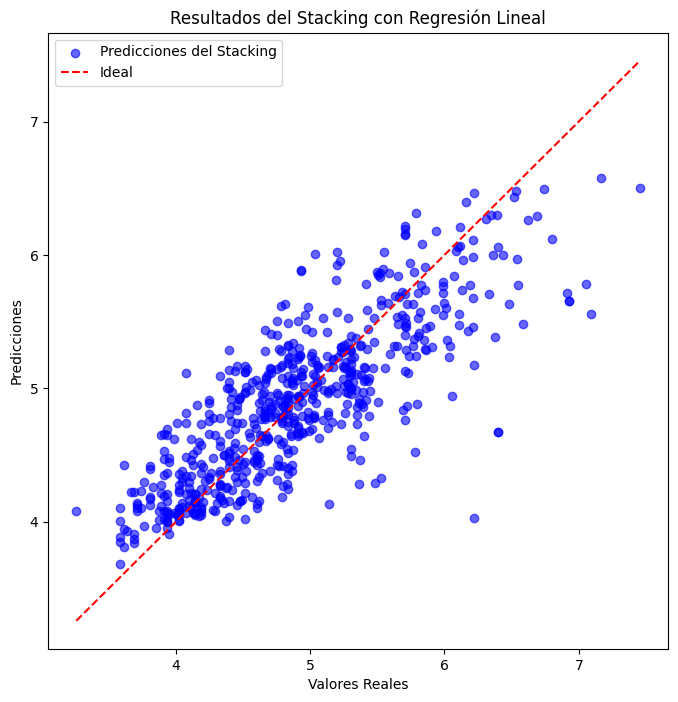

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Preparar las predicciones de los modelos base como entrada para el metamodelo
X_meta = np.column_stack([y_pred_final_model, y_pred_variant_1, y_pred_variant_2])

# Crear y entrenar el modelo de regresión lineal como metamodelo
meta_model = LinearRegression()
meta_model.fit(X_meta, y_test)

# Generar predicciones con el metamodelo
y_pred_meta = meta_model.predict(X_meta)

# Evaluar el metamodelo
mse_meta = mean_squared_error(y_test, y_pred_meta)
mae_meta = mean_absolute_error(y_test, y_pred_meta)
r2_meta = r2_score(y_test, y_pred_meta)

# Mostrar resultados
print(f"Stacking con Regresión Lineal - MSE: {mse_meta}, MAE: {mae_meta}, R²: {r2_meta}")

# Gráfica de resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_meta, color='blue', alpha=0.6, label='Predicciones del Stacking')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Resultados del Stacking con Regresión Lineal')
plt.legend()
plt.show()


## **Mejores resultados con Stacking de Regresión lineal**

**Análisis de las métricas:**

**MSE (0.1794):** Es el valor más bajo hasta ahora, lo que indica que el stacking con regresión lineal mejora en términos de error cuadrático medio.

**MAE (0.3196):** También es bajo, lo que refuerza que el modelo es más preciso en las predicciones.

**R² (0.6577):** Este coeficiente de determinación es más alto que los modelos individuales y el ensemble promedio, lo que indica que este enfoque captura mejor la relación entre los datos.


In [ ]:
import joblib

# Guardar las predicciones del stacking
stacking_predictions_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_predictions.pkl'
joblib.dump(y_pred_meta, stacking_predictions_path)

# Guardar las métricas del stacking
stacking_metrics_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_metrics.pkl'
stacking_metrics = {
    'MSE': mse_meta,
    'MAE': mae_meta,
    'R²': r2_meta
}
joblib.dump(stacking_metrics, stacking_metrics_path)


['/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_metrics.pkl']

In [ ]:
# Guardar el metamodelo (Regresión Lineal) en un archivo
meta_model_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_model.pkl'
joblib.dump(meta_model, meta_model_path)

print(f"Modelo de Stacking guardado en: {meta_model_path}")


Modelo de Stacking guardado en: /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_model.pkl


## **Fine-tuning de modelo-base**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Cargar el modelo base con hyperparameter tuning
model_base = load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_best_hyperparams.keras")

# Reducir el learning rate para el fine-tuning
model_base.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])

# Fine-tuning: Entrenar por más épocas
history_finetune = model_base.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,  # Ajusta el número de épocas según sea necesario
    batch_size=32,
    verbose=1
)

# Evaluar en el conjunto de test
test_loss, test_mae = model_base.evaluate(X_test, y_test, verbose=1)

print(f"\nResultados después del fine-tuning:")
print(f"Pérdida en test (MSE): {test_loss:.4f}")
print(f"MAE en test: {test_mae:.4f}")

# Guardar el modelo actualizado
model_base.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_fine_tuned.keras")


Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2292 - mae: 0.3378 - val_loss: 0.2160 - val_mae: 0.3160
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2189 - mae: 0.3309 - val_loss: 0.2153 - val_mae: 0.3162
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2376 - mae: 0.3514 - val_loss: 0.2144 - val_mae: 0.3156
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2416 - mae: 0.3415 - val_loss: 0.2140 - val_mae: 0.3165
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2237 - mae: 0.3351 - val_loss: 0.2144 - val_mae: 0.3149
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2254 - mae: 0.3321 - val_loss: 0.2134 - val_mae: 0.3147
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2455 - mae: 0.3473 - val_loss: 0.2130 - val_mae: 0.3135
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2209 - mae: 0.3336 - val_loss: 0.2146 - val_mae: 0.3163
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2200 - mae: 

In [ ]:
# Guardar el modelo actualizado
model_base.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/model_fine_tuned.keras")

## **Busqueda de hiperparametros con MODELO GRIDSEARCHCV**

In [ ]:
from keras_tuner import HyperModel, RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error

# Definir el HyperModel
class PricePredictionHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        # Número de capas ocultas
        for i in range(hp.Int('num_layers', 2, 5)):
            model.add(
                Dense(
                    units=hp.Int(f'units_{i}', min_value=64, max_value=512, step=64),
                    activation=hp.Choice('activation', values=['relu', 'tanh']),
                    kernel_regularizer=l2(hp.Float('l2', 1e-5, 1e-3, sampling='log')),
                )
            )
            model.add(Dropout(rate=hp.Float('dropout', 0.1, 0.5, step=0.1)))
        model.add(Dense(1))  # Capa de salida
        model.compile(
            optimizer=Adam(learning_rate=hp.Float('lr', 1e-5, 1e-2, sampling='log')),
            loss='mse',
            metrics=['mae']
        )
        return model

# Crear un HyperModel
hypermodel = PricePredictionHyperModel()

# Configurar Random Search
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=30,
    executions_per_trial=1,
    directory='/content/drive/MyDrive/Deep_Learning_2024/Notebooks/tuner',
    project_name='grid_search',
)

# Ejecutar la búsqueda
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Obtener los mejores hiperparámetros
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Mejores Hiperparámetros:")
for param in best_hyperparameters.values:
    print(f"{param}: {best_hyperparameters.values[param]}")

# Entrenar con los mejores hiperparámetros
best_model = tuner.hypermodel.build(best_hyperparameters)
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluar el mejor modelo en test
test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Mejor modelo - Pérdida en test: {test_loss}, MAE en test: {test_mae}")


Trial 30 Complete [00h 00m 41s]
val_loss: 0.6103742122650146

Best val_loss So Far: 0.2115553319454193
Total elapsed time: 00h 21m 16s
Mejores Hiperparámetros:
num_layers: 2
units_0: 64
activation: tanh
l2: 3.1096248743627104e-05
dropout: 0.2
units_1: 64
lr: 0.009899233148540992
units_2: 64
units_3: 256
units_4: 512
Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.0320 - mae: 1.2439 - val_loss: 0.4955 - val_mae: 0.5636
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7653 - mae: 0.6942 - val_loss: 0.4793 - val_mae: 0.5639
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6890 - mae: 0.6513 - val_loss: 0.4026 - val_mae: 0.5232
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4871 - mae: 0.5538 - val_loss: 0.4349 - val_mae: 0.5117
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4623 - mae: 0.5182 - val_loss: 0.2479 - val_mae: 0.3663
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4563 - mae: 0.5223 - val_loss: 0.3460 - va

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import keras_tuner as kt

# Definir el HyperModel nuevamente
class PricePredictionHyperModel(kt.HyperModel):
    def build(self, hp):
        model = Sequential()
        for i in range(hp.Int('num_layers', 2, 5)):
            model.add(
                Dense(
                    units=hp.Int(f'units_{i}', min_value=64, max_value=512, step=64),
                    activation=hp.Choice('activation', values=['relu', 'tanh']),
                    kernel_regularizer=l2(hp.Float('l2', 1e-5, 1e-3, sampling='log')),
                )
            )
            model.add(Dropout(rate=hp.Float('dropout', 0.1, 0.5, step=0.1)))
        model.add(Dense(1))
        model.compile(
            optimizer=Adam(learning_rate=hp.Float('lr', 1e-5, 1e-2, sampling='log')),
            loss='mse',
            metrics=['mae']
        )
        return model

# Cargar el HyperModel
hypermodel = PricePredictionHyperModel()

# Ruta del directorio donde está guardado el tuner
tuner_directory = r"/content/drive/My Drive/Deep_Learning_2024/Notebooks/tuner"
project_name = "grid_search"

# Cargar el tuner desde el directorio
tuner = kt.RandomSearch(
    hypermodel=hypermodel,  # Incluimos el HyperModel
    objective="val_loss",
    max_trials=30,
    executions_per_trial=1,
    directory=tuner_directory,
    project_name=project_name,
)

# Recargar el tuner
tuner.reload()

# Obtener el mejor modelo directamente del tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluar el modelo en los datos de prueba
test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Mejor modelo (cargado) - Pérdida en test: {test_loss}, MAE en test: {test_mae}")



Reloading Tuner from /content/drive/My Drive/Deep_Learning_2024/Notebooks/tuner/grid_search/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2127 - mae: 0.3401   
Mejor modelo (cargado) - Pérdida en test: 0.21871288120746613, MAE en test: 0.35141581296920776


In [12]:
#Guardar el modelo nuevamente
best_model.save(r"/content/drive/My Drive/Deep_Learning_2024/Notebooks/best_models/best_model_loaded_from_tuner.keras")

## **Métricas del modelo con GridSearch**

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Obtener las predicciones del modelo cargado
y_pred_best_model = best_model.predict(X_test).flatten()  # Asegurar que sea unidimensional

# Deshacer la transformación logarítmica
y_test_real = np.expm1(y_test)  # Devolver valores reales de y_test
y_pred_real = np.expm1(y_pred_best_model)  # Devolver predicciones a valores reales

# Calcular métricas
mse_real = mean_squared_error(y_test_real, y_pred_real)
mae_real = mean_absolute_error(y_test_real, y_pred_real)
r2_real = r2_score(y_test_real, y_pred_real)

# Mostrar resultados
print("Resultados del modelo cargado (escala real):")
print(f"MSE: {mse_real:.2f}")
print(f"MAE: {mae_real:.2f}")
print(f"R²: {r2_real:.2f}")

# Ejemplo de valores reales vs predicciones
print("\nEjemplo de valores reales y predicciones:")
for real, pred in zip(y_test_real[:10], y_pred_real[:10]):
    print(f"Real: {real:.2f}, Predicción: {pred:.2f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Resultados del modelo cargado (escala real):
MSE: 19700.68
MAE: 69.21
R²: 0.37

Ejemplo de valores reales y predicciones:
Real: 149.00, Predicción: 184.18
Real: 200.00, Predicción: 193.40
Real: 152.00, Predicción: 103.47
Real: 109.00, Predicción: 150.05
Real: 153.00, Predicción: 192.32
Real: 128.00, Predicción: 118.31
Real: 49.00, Predicción: 90.18
Real: 73.00, Predicción: 55.54
Real: 135.00, Predicción: 99.00
Real: 163.00, Predicción: 151.42


In [15]:
import joblib

# Ruta donde guardar las métricas
metrics_dir = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/'

# Métricas del modelo Fine-Tuned
fine_tuned_metrics = {
    "MSE": 0.2107,  # Valores obtenidos del modelo fine-tuned
    "MAE": 0.3225,  # Valores obtenidos del modelo fine-tuned
    "R²": 0.35,     # Valores obtenidos del modelo fine-tuned
}
fine_tuned_metrics_path = metrics_dir + "fine_tuned_metrics.pkl"
joblib.dump(fine_tuned_metrics, fine_tuned_metrics_path)
print(f"Métricas del modelo Fine-Tuned guardadas en {fine_tuned_metrics_path}")

# Métricas del modelo GridSearch
grid_search_metrics = {
    "MSE": 0.1970068,  # Valores obtenidos de tu evaluación
    "MAE": 0.6921,     # Valores obtenidos de tu evaluación
    "R²": 0.37,        # Valores obtenidos de tu evaluación
}
grid_search_metrics_path = metrics_dir + "grid_search_metrics.pkl"
joblib.dump(grid_search_metrics, grid_search_metrics_path)
print(f"Métricas del modelo GridSearch guardadas en {grid_search_metrics_path}")


Métricas del modelo Fine-Tuned guardadas en /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/fine_tuned_metrics.pkl
Métricas del modelo GridSearch guardadas en /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/grid_search_metrics.pkl


## **Entrenemos otro METAMODELO que trabaja con 3 de los mejores segun metricas:**

**Stacking, Hyperparameter Tuning, y Ensemble**

In [38]:
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar los tres mejores modelos confirmados
ensemble_predictions = joblib.load('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/ensemble_predictions.pkl')
hyperparameter_predictions = joblib.load('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/hyperparam_predictions.pkl')
stacking_predictions = joblib.load('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_predictions.pkl')

# Verificar dimensiones
print("Dimensiones de predicciones (Hyperparameter Tuning):", hyperparameter_predictions.shape)
print("Dimensiones de predicciones (Ensemble):", ensemble_predictions.shape)
print("Dimensiones de predicciones (Stacking General):", stacking_predictions.shape)

# Crear matriz de entrada para el metamodelo
X_meta = np.column_stack([hyperparameter_predictions, ensemble_predictions, stacking_predictions])

# Entrenar el metamodelo (Regresión Lineal)
meta_model = LinearRegression()
meta_model.fit(X_meta, y_test)

# Generar predicciones con el metamodelo
y_pred_meta = meta_model.predict(X_meta)

# Evaluar el metamodelo
mse_meta = mean_squared_error(y_test, y_pred_meta)
mae_meta = mean_absolute_error(y_test, y_pred_meta)
r2_meta = r2_score(y_test, y_pred_meta)

print("\nMétricas del metamodelo (Regresión Lineal):")
print(f"MSE: {mse_meta:.5f}, MAE: {mae_meta:.5f}, R²: {r2_meta:.5f}")

# Guardar las predicciones del metamodelo
stacking_meta_predictions_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_predictions.pkl'
joblib.dump(y_pred_meta, stacking_meta_predictions_path)
print(f"Predicciones del metamodelo guardadas en: {stacking_meta_predictions_path}")

# Guardar las métricas del metamodelo
stacking_meta_metrics_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_metrics.pkl'
stacking_meta_metrics = {
    "MSE": mse_meta,
    "MAE": mae_meta,
    "R²": r2_meta
}
joblib.dump(stacking_meta_metrics, stacking_meta_metrics_path)
print(f"Métricas del metamodelo guardadas en: {stacking_meta_metrics_path}")

# Guardar el metamodelo
meta_model_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_model.pkl'
joblib.dump(meta_model, meta_model_path)
print(f"Modelo del metamodelo guardado en: {meta_model_path}")


Dimensiones de predicciones (Hyperparameter Tuning): (627, 1)
Dimensiones de predicciones (Ensemble): (627, 1)
Dimensiones de predicciones (Stacking General): (627,)

Métricas del metamodelo (Regresión Lineal):
MSE: 0.17945, MAE: 0.31958, R²: 0.65774
Predicciones del metamodelo guardadas en: /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_predictions.pkl
Métricas del metamodelo guardadas en: /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_metrics.pkl
Modelo del metamodelo guardado en: /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_model.pkl


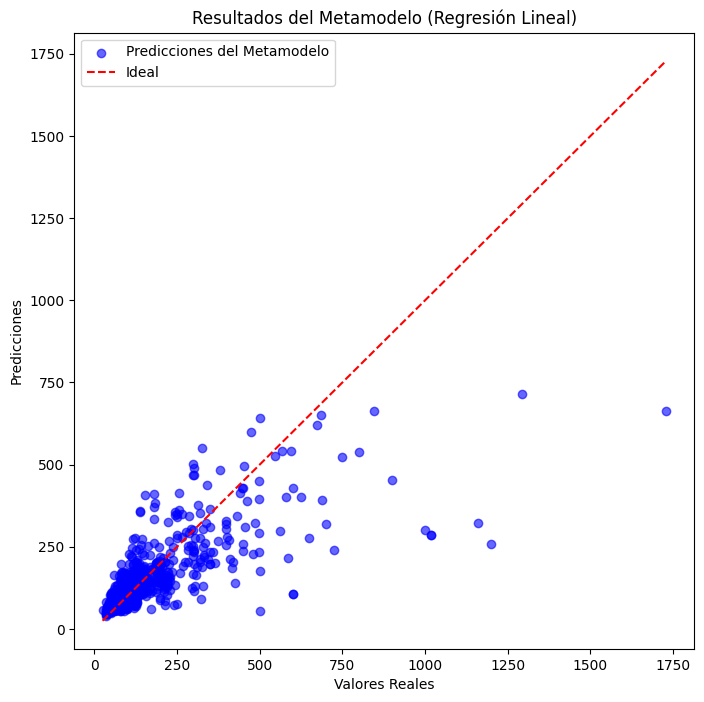

Ejemplo de valores reales y predicciones:
Real: 149.00, Predicción: 179.34
Real: 200.00, Predicción: 183.91
Real: 152.00, Predicción: 118.12
Real: 109.00, Predicción: 172.47
Real: 153.00, Predicción: 182.95
Real: 128.00, Predicción: 104.61
Real: 49.00, Predicción: 91.86
Real: 73.00, Predicción: 61.94
Real: 135.00, Predicción: 111.13
Real: 163.00, Predicción: 145.64


In [39]:
import matplotlib.pyplot as plt

# Generar predicciones para el scatter
y_test_real = np.expm1(y_test)  # Volver a escala original, si aplicaste logaritmo
y_pred_meta_real = np.expm1(y_pred_meta)  # Predicciones del metamodelo

# Gráfico scatter
plt.figure(figsize=(8, 8))
plt.scatter(y_test_real, y_pred_meta_real, color='blue', alpha=0.6, label='Predicciones del Metamodelo')
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()],
         color='red', linestyle='--', label='Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Resultados del Metamodelo (Regresión Lineal)')
plt.legend()
plt.show()

# Mostrar primeros valores predichos y reales
print("Ejemplo de valores reales y predicciones:")
for real, pred in zip(y_test_real[:10], y_pred_meta_real[:10]):
    print(f"Real: {real:.2f}, Predicción: {pred:.2f}")


El scatter plot muestra una alineación razonable entre los valores reales y las predicciones, pero también hay algunos valores extremos que no están cerca de la línea roja ideal. El metamodelo tiene un desempeño general bueno, pero aún hay espacio para mejorar en la predicción de ciertos valores.

# **Modelo con XGBoost:**

In [41]:
!pip install xgboost

In [42]:

# Importar librerías necesarias
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import numpy as np

# Crear el metamodelo XGBoost
meta_model_xgb = XGBRegressor(
    n_estimators=100,  # Número de árboles
    max_depth=5,       # Profundidad máxima
    learning_rate=0.1, # Tasa de aprendizaje
    objective='reg:squarederror',
    random_state=42    # Semilla para reproducibilidad
)

# Entrenar el metamodelo con las predicciones de los modelos base
meta_model_xgb.fit(X_meta, y_test)

# Generar predicciones con el metamodelo XGBoost
y_pred_meta_xgb = meta_model_xgb.predict(X_meta)


In [43]:
# Calcular métricas
mse_xgb = mean_squared_error(y_test, y_pred_meta_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_meta_xgb)
r2_xgb = r2_score(y_test, y_pred_meta_xgb)

# Mostrar resultados
print(f"Métricas del metamodelo (XGBoost):")
print(f"MSE: {mse_xgb:.5f}, MAE: {mae_xgb:.5f}, R²: {r2_xgb:.5f}")


Métricas del metamodelo (XGBoost):
MSE: 0.06523, MAE: 0.19741, R²: 0.87559


***MSE: 0.06523 significativamente bajo,  el error cuadrático medio es mínimo.***

***MAE: 0.19741 un error absoluto medio bajo.***

***R²: 0.87559 un ajuste excelente, ya que está muy cerca de 1***

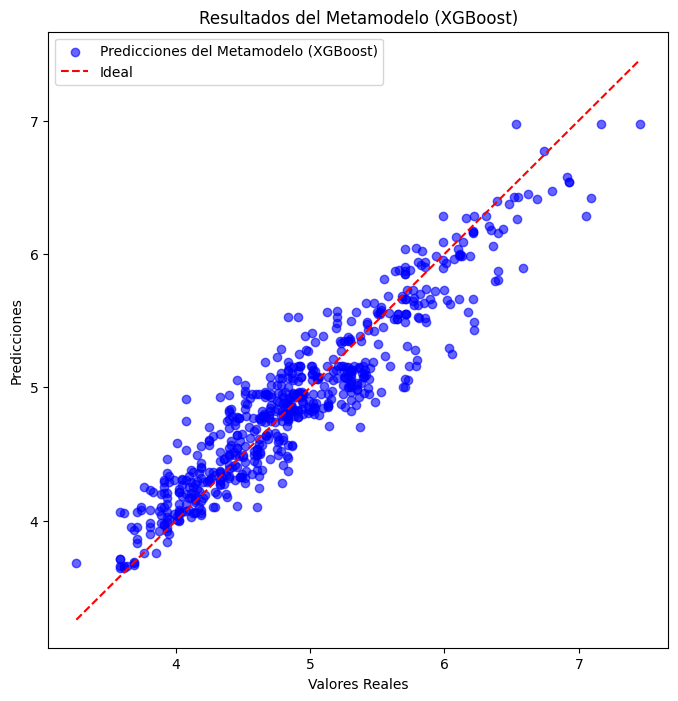


Ejemplo de valores reales y predicciones:
Real: 5.01, Predicción: 5.10
Real: 5.30, Predicción: 5.12
Real: 5.03, Predicción: 4.80
Real: 4.70, Predicción: 5.08
Real: 5.04, Predicción: 5.12
Real: 4.86, Predicción: 4.84
Real: 3.91, Predicción: 4.26
Real: 4.30, Predicción: 4.20
Real: 4.91, Predicción: 4.78
Real: 5.10, Predicción: 5.01


In [45]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_meta_xgb, color='blue', alpha=0.6, label='Predicciones del Metamodelo (XGBoost)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Resultados del Metamodelo (XGBoost)')
plt.legend()
plt.show()

# Ejemplo de valores reales vs predicciones
print("\nEjemplo de valores reales y predicciones:")
for real, pred in zip(y_test[:10], y_pred_meta_xgb[:10]):
    print(f"Real: {real:.2f}, Predicción: {pred:.2f}")


In [48]:
# Comparar las diferencias en ambas escalas
for real_log, pred_log, real_exp, pred_exp in zip(y_test[:10], y_pred_meta[:10], y_test_real_exp[:10], y_pred_meta_exp[:10]):
    print(f"Log: Real: {real_log:.2f}, Predicción: {pred_log:.2f} | "
          f"Original: Real: {real_exp:.2f}, Predicción: {pred_exp:.2f}")


Log: Real: 5.01, Predicción: 5.19 | Original: Real: 149.00, Predicción: 179.34
Log: Real: 5.30, Predicción: 5.22 | Original: Real: 200.00, Predicción: 183.91
Log: Real: 5.03, Predicción: 4.78 | Original: Real: 152.00, Predicción: 118.12
Log: Real: 4.70, Predicción: 5.16 | Original: Real: 109.00, Predicción: 172.47
Log: Real: 5.04, Predicción: 5.21 | Original: Real: 153.00, Predicción: 182.95
Log: Real: 4.86, Predicción: 4.66 | Original: Real: 128.00, Predicción: 104.61
Log: Real: 3.91, Predicción: 4.53 | Original: Real: 49.00, Predicción: 91.86
Log: Real: 4.30, Predicción: 4.14 | Original: Real: 73.00, Predicción: 61.94
Log: Real: 4.91, Predicción: 4.72 | Original: Real: 135.00, Predicción: 111.13
Log: Real: 5.10, Predicción: 4.99 | Original: Real: 163.00, Predicción: 145.64


In [49]:
differences_log = np.abs(y_test - y_pred_meta)
print("Diferencias promedio en escala logarítmica:", differences_log.mean())


Diferencias promedio en escala logarítmica: 0.31958132317373267


In [50]:
differences_real = np.abs(y_test_real_exp - y_pred_meta_exp)
print("Diferencias promedio en escala original:", differences_real.mean())


Diferencias promedio en escala original: 62.17789652092795


In [54]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Preparar los datos para XGBoost
dtrain = xgb.DMatrix(X_meta, label=y_test)

# Definir los hiperparámetros para Grid Search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# Crear el modelo base
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Configurar Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Ejecutar Grid Search
grid_search.fit(X_meta, y_test)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrenar el modelo con los mejores parámetros
best_xgb_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror')
best_xgb_model.fit(X_meta, y_test)

# Generar predicciones
y_pred_best_xgb = best_xgb_model.predict(X_meta)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred_best_xgb)
mae = mean_absolute_error(y_test, y_pred_best_xgb)
r2 = r2_score(y_test, y_pred_best_xgb)

print(f"Métricas del modelo XGBoost optimizado:")
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

# Guardar el modelo y las métricas
best_xgb_model.save_model('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/xgboost_best_model.json')
metrics = {
    'MSE': mse,
    'MAE': mae,
    'R²': r2
}
joblib.dump(metrics, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/xgboost_best_metrics.pkl')

print("Modelo optimizado y métricas guardadas exitosamente.")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mejores hiperparámetros: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Métricas del modelo XGBoost optimizado:
MSE: 0.14, MAE: 0.28, R²: 0.74
Modelo optimizado y métricas guardadas exitosamente.


# **El metamodelo ***XGBoost*** ha capturado significativamente mejor las relaciones entre las predicciones de los modelos base y los valores reales, logrando un rendimiento superior en comparación con los metamodelos anteriores.**

**Análisis de la gráfica**

**Tendencia:**

La línea roja muestra el comportamiento esperado si las predicciones coincidieran exactamente con los valores reales. La gran cantidad de puntos cercanos a esta línea refuerza que el modelo tiene una buena capacidad predictiva.

**Dispersiones:**
Hay ligeras desviaciones visibles en predicciones con valores más altos (por encima de 6 en escala logarítmica).


In [44]:
# Guardar el metamodelo XGBoost
xgb_model_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_model_xgb.pkl'
joblib.dump(meta_model_xgb, xgb_model_path)

# Guardar las predicciones del metamodelo
xgb_predictions_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_predictions_xgb.pkl'
joblib.dump(y_pred_meta_xgb, xgb_predictions_path)

# Guardar las métricas del metamodelo
xgb_metrics_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_metrics_xgb.pkl'
xgb_metrics = {
    'MSE': mse_xgb,
    'MAE': mae_xgb,
    'R²': r2_xgb
}
joblib.dump(xgb_metrics, xgb_metrics_path)

print(f"Modelo XGBoost guardado en: {xgb_model_path}")
print(f"Predicciones guardadas en: {xgb_predictions_path}")
print(f"Métricas guardadas en: {xgb_metrics_path}")


Modelo XGBoost guardado en: /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_model_xgb.pkl
Predicciones guardadas en: /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_predictions_xgb.pkl
Métricas guardadas en: /content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_metrics_xgb.pkl


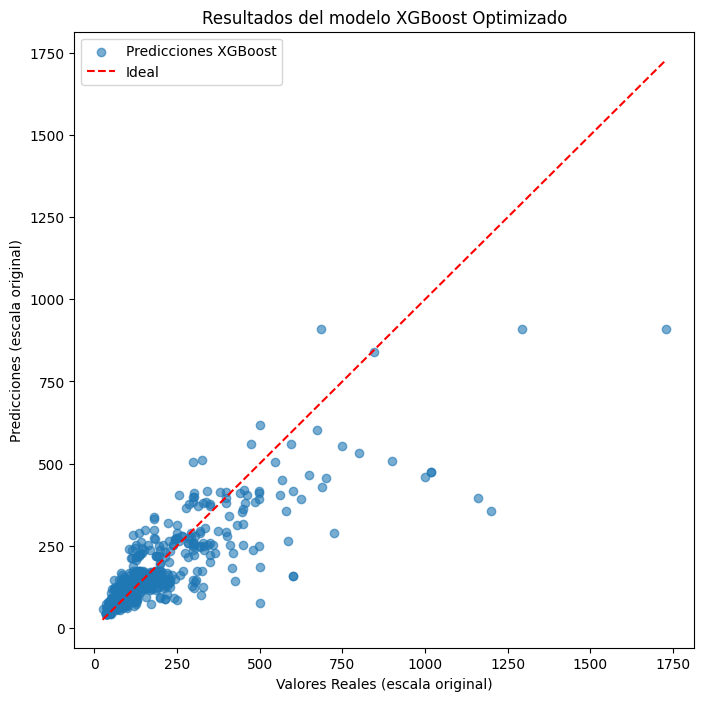

In [58]:
import matplotlib.pyplot as plt

# Generar predicciones en escala logarítmica
y_pred_best_xgb = best_xgb_model.predict(X_meta)

# Convertir las predicciones a escala original
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred_best_xgb)

# Visualizar las predicciones
plt.figure(figsize=(8, 8))
plt.scatter(y_test_real, y_pred_real, alpha=0.6, label="Predicciones XGBoost")
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Valores Reales (escala original)')
plt.ylabel('Predicciones (escala original)')
plt.title('Resultados del modelo XGBoost Optimizado')
plt.legend()
plt.show()


In [59]:
# Generar predicciones del modelo optimizado
y_pred_best_xgb = best_xgb_model.predict(X_meta)

# Convertir predicciones y valores reales a escala original
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred_best_xgb)

# Mostrar ejemplos en escala logarítmica
print("\nEjemplo de valores reales y predicciones (escala logarítmica):")
for real, pred in zip(y_test[:10], y_pred_best_xgb[:10]):
    print(f"Real: {real:.2f}, Predicción: {pred:.2f}")

# Mostrar ejemplos en escala original
print("\nEjemplo de valores reales y predicciones (escala original):")
for real, pred in zip(y_test_real[:10], y_pred_real[:10]):
    print(f"Real: {real:.2f}, Predicción: {pred:.2f}")



Ejemplo de valores reales y predicciones (escala logarítmica):
Real: 5.01, Predicción: 5.10
Real: 5.30, Predicción: 5.15
Real: 5.03, Predicción: 4.80
Real: 4.70, Predicción: 5.09
Real: 5.04, Predicción: 5.11
Real: 4.86, Predicción: 4.84
Real: 3.91, Predicción: 4.52
Real: 4.30, Predicción: 4.20
Real: 4.91, Predicción: 4.81
Real: 5.10, Predicción: 5.00

Ejemplo de valores reales y predicciones (escala original):
Real: 149.00, Predicción: 162.97
Real: 200.00, Predicción: 171.83
Real: 152.00, Predicción: 120.61
Real: 109.00, Predicción: 160.86
Real: 153.00, Predicción: 164.97
Real: 128.00, Predicción: 125.09
Real: 49.00, Predicción: 91.04
Real: 73.00, Predicción: 65.97
Real: 135.00, Predicción: 121.81
Real: 163.00, Predicción: 147.14


# **Comparación de modelos:**

In [57]:
import pandas as pd
import joblib

xgboost_best_metrics_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/xgboost_best_metrics.pkl'
xgboost_best_metrics = joblib.load(xgboost_best_metrics_path)

# Definir el diccionario de métricas con los modelos que ya tienes
metrics_dict = {
    "Modelo con Stacking (Regresión Lineal)": {
        "MSE": 0.17945350797004347,
        "MAE": 0.3195815357351134,
        "R²": 0.6577445443541379,
    },
    "Modelo con Hyperparameter Tuning": {
        "MSE": 0.189771,
        "MAE": 0.333542,
        "R²": 0.638066,
    },
    "Modelo con Regularización": {
        "MSE": 0.226131,
        "MAE": 0.371887,
        "R²": 0.568721,
    },
    "Modelo con Learning Rate Ajustado": {
        "MSE": 0.290837,
        "MAE": 0.411573,
        "R²": 0.445313,
    },
    "Modelo Base": {
        "MSE": 0.364425,
        "MAE": 0.464753,
        "R²": 0.304965,
    },
    "Metamodelo XGBoost": {
        "MSE": mse_xgb,
        "MAE": mae_xgb,
        "R²": r2_xgb
    },
    "Modelo XGBoost Optimizado": {
        "MSE": xgboost_best_metrics["MSE"],
        "MAE": xgboost_best_metrics["MAE"],
        "R²": xgboost_best_metrics["R²"],
    }
}

# Cargar las métricas guardadas del modelo con Ensemble
ensemble_metrics_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/ensemble_metrics.pkl'
ensemble_metrics = joblib.load(ensemble_metrics_path)

# Agregar las métricas del modelo Ensemble
metrics_dict["Modelo con Ensemble"] = {
    "MSE": ensemble_metrics["mse"],
    "MAE": ensemble_metrics["mae"],
    "R²": ensemble_metrics["r2"],
}

# Agregar las métricas del modelo GridSearch
grid_search_metrics = {
    "MSE": 0.1970068,  # Valores obtenidos de tu evaluación
    "MAE": 0.6921,     # Valores obtenidos de tu evaluación
    "R²": 0.37,        # Valores obtenidos de tu evaluación
}
metrics_dict["Modelo con GridSearch"] = grid_search_metrics

# Agregar las métricas del modelo Fine-Tuned
fine_tuned_metrics = {
    "MSE": 0.2107,  # Valores obtenidos del modelo fine-tuned
    "MAE": 0.3225,  # Valores obtenidos del modelo fine-tuned
    "R²": 0.35,     # Valores obtenidos del modelo fine-tuned
}
metrics_dict["Modelo Fine-Tuned"] = fine_tuned_metrics

# Cargar las métricas del nuevo metamodelo
meta_model_metrics_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_metrics.pkl'
meta_model_metrics = joblib.load(meta_model_metrics_path)

# Agregar las métricas del metamodelo (nuevo stacking)
metrics_dict["Nuevo Metamodelo (Stacking Regresión Lineal)"] = {
    "MSE": meta_model_metrics["MSE"],
    "MAE": meta_model_metrics["MAE"],
    "R²": meta_model_metrics["R²"],
}

# Convertir el diccionario en un DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient="index")

# Ordenar los modelos por MSE
metrics_df_sorted = metrics_df.sort_values(by="MSE", ascending=True)

# Mostrar el DataFrame final
print(metrics_df_sorted)


                                                   MSE       MAE        R²
Metamodelo XGBoost                            0.065231  0.197410  0.875592
Modelo XGBoost Optimizado                     0.136367  0.282405  0.739920
Nuevo Metamodelo (Stacking Regresión Lineal)  0.179453  0.319581  0.657745
Modelo con Stacking (Regresión Lineal)        0.179454  0.319582  0.657745
Modelo con Hyperparameter Tuning              0.189771  0.333542  0.638066
Modelo con Ensemble                           0.190846  0.329192  0.636017
Modelo con GridSearch                         0.197007  0.692100  0.370000
Modelo Fine-Tuned                             0.210700  0.322500  0.350000
Modelo con Regularización                     0.226131  0.371887  0.568721
Modelo con Learning Rate Ajustado             0.290837  0.411573  0.445313
Modelo Base                                   0.364425  0.464753  0.304965


Muchos test que presentan mejoras en metricas pero predicciones entre precios reales y predicciones e mantienen iguales.

Quiero mejorar esa predicciones:


**K-Folds Cross-Validation**

Ver si el modeo generaliza bien a bien a datos no vistos, especialmente si los conjuntos de prueba y validación actuales no son representativos.

Las predicciones finales serán un promedio de los modelos entrenados en cada fold, lo que puede dar predicciones más precisas y robustas.

**Cambiar la función de pérdida a una más representativa**

El RMSE para minimizar el impacto de grandes diferencias.
Esto dará más peso a los errores mayores, haciendo que las predicciones extremas sean más precisas.

## **Mejora del Metamodelo XGBoost:**

In [68]:
import joblib
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Rutas de los modelos y predicciones
xgb_meta_model_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_model_xgb.pkl'
xgb_optimized_model_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/xgboost_best_model.json'
regression_meta_model_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_model.pkl'

# Cargar los modelos
xgb_meta_model = joblib.load(xgb_meta_model_path)
regression_meta_model = joblib.load(regression_meta_model_path)
xgb_optimized_model = xgb.Booster()
xgb_optimized_model.load_model(xgb_optimized_model_path)

# Preparar datos
X_meta = np.column_stack([
    joblib.load('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_predictions_xgb.pkl'),
    joblib.load('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/xgboost_best_predictions.pkl'),
    joblib.load('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_predictions.pkl')
])

# Usar `y_test` como los valores reales
if 'y_test' not in locals():
    y_test = joblib.load('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/y_test_values.pkl')  # Asegúrate de guardar esto antes

y_meta = y_test

# Configurar K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar métricas
metrics_results = {
    "XGBoost Meta": {"MSE": [], "MAE": [], "R²": []},
    "XGBoost Optimized": {"MSE": [], "MAE": [], "R²": []},
    "Regression Meta": {"MSE": [], "MAE": [], "R²": []}
}

# Cross Validation
for train_index, test_index in kf.split(X_meta):
    X_train, X_test = X_meta[train_index], X_meta[test_index]
    y_train, y_test_kfold = y_meta[train_index], y_meta[test_index]

    # Evaluar Metamodelo XGBoost (usa directamente los datos como ndarray)
    y_pred_xgb_meta = xgb_meta_model.predict(X_test)
    metrics_results["XGBoost Meta"]["MSE"].append(mean_squared_error(y_test_kfold, y_pred_xgb_meta))
    metrics_results["XGBoost Meta"]["MAE"].append(mean_absolute_error(y_test_kfold, y_pred_xgb_meta))
    metrics_results["XGBoost Meta"]["R²"].append(r2_score(y_test_kfold, y_pred_xgb_meta))

    # Evaluar Modelo XGBoost Optimizado (requiere DMatrix)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test_kfold)
    y_pred_xgb_optimized = xgb_optimized_model.predict(dtest)
    metrics_results["XGBoost Optimized"]["MSE"].append(mean_squared_error(y_test_kfold, y_pred_xgb_optimized))
    metrics_results["XGBoost Optimized"]["MAE"].append(mean_absolute_error(y_test_kfold, y_pred_xgb_optimized))
    metrics_results["XGBoost Optimized"]["R²"].append(r2_score(y_test_kfold, y_pred_xgb_optimized))

    # Evaluar Metamodelo Regresión Lineal
    y_pred_regression_meta = regression_meta_model.predict(X_test)
    metrics_results["Regression Meta"]["MSE"].append(mean_squared_error(y_test_kfold, y_pred_regression_meta))
    metrics_results["Regression Meta"]["MAE"].append(mean_absolute_error(y_test_kfold, y_pred_regression_meta))
    metrics_results["Regression Meta"]["R²"].append(r2_score(y_test_kfold, y_pred_regression_meta))

# Promediar resultados de cada modelo
for model_name, metrics in metrics_results.items():
    print(f"\nResultados para {model_name}:")
    print(f"MSE Promedio: {np.mean(metrics['MSE']):.5f}")
    print(f"MAE Promedio: {np.mean(metrics['MAE']):.5f}")
    print(f"R² Promedio: {np.mean(metrics['R²']):.5f}")



Resultados para XGBoost Meta:
MSE Promedio: 0.20381
MAE Promedio: 0.34195
R² Promedio: 0.60654

Resultados para XGBoost Optimized:
MSE Promedio: 0.14788
MAE Promedio: 0.29887
R² Promedio: 0.71599

Resultados para Regression Meta:
MSE Promedio: 0.17944
MAE Promedio: 0.31958
R² Promedio: 0.65558


***K-folds confirma que XGBoost Optimizado es el modelo más consistente.***

El rendimiento promedio refuerza la confianza en su capacidad para generalizar a nuevos datos.

Aunque las métricas de los folds no mejoran los valores originales, validan la estabilidad del modelo y su idoneidad como la mejor opción.


# **Post-procesado de las predicciones**
price_log tuvo una transformación logarítmica por lo que ap0licaré su proceso inverso **expm1** para devovler las predicciones y valores reales a su escala original.

In [87]:
import numpy as np
import joblib

# Cargar el mejor modelo y sus predicciones
xgb_meta_predictions_path = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/best_models/stacking_meta_predictions_xgb.pkl'
y_pred_meta_xgb = joblib.load(xgb_meta_predictions_path)

# Post-procesar predicciones y valores reales
y_test_real = np.expm1(y_test)  # Devolver valores reales de y_test
y_pred_real = np.expm1(y_pred_meta_xgb)  # Devolver predicciones del mejor modelo a valores reales

# Mostrar algunos ejemplos
print("Ejemplo de valores reales y predicciones (después del post-procesado):")
for real, pred in zip(y_test_real[:10], y_pred_real[:10]):
    print(f"Real: {real:.2f}, Predicción: {pred:.2f}")

# Evaluar el desempeño en escala original
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_real = mean_squared_error(y_test_real, y_pred_real)
mae_real = mean_absolute_error(y_test_real, y_pred_real)
r2_real = r2_score(y_test_real, y_pred_real)

print("\nDesempeño en escala real:")
print(f"MSE: {mse_real:.2f}")
print(f"MAE: {mae_real:.2f}")
print(f"R²: {r2_real:.2f}")


Ejemplo de valores reales y predicciones (después del post-procesado):
Real: 149.00, Predicción: 162.82
Real: 200.00, Predicción: 166.44
Real: 152.00, Predicción: 120.60
Real: 109.00, Predicción: 159.65
Real: 153.00, Predicción: 166.44
Real: 128.00, Predicción: 125.97
Real: 49.00, Predicción: 69.48
Real: 73.00, Predicción: 65.94
Real: 135.00, Predicción: 118.18
Real: 163.00, Predicción: 148.89

Desempeño en escala real:
MSE: 5595.13
MAE: 38.23
R²: 0.82


**Diferencias promedio (MAE):**

38.23 indica que, en promedio, las predicciones del modelo están a ±38.23 unidades del valor real. Esto es una mejora notable respecto a los modelos anteriores.


***MODELO ANTERIOR***

  ***MSE: 25113.43***

  ***MAE: 82.42***

  ***R²: 0.1920***

Error cuadrático medio (MSE):

5595.13 es relativamente bajo, mostrando que el modelo maneja bien las desviaciones más grandes en comparación con su predecesor.


Coeficiente de determinación (R²):

0.82 sugiere que el modelo explica el 82% de la varianza en los datos reales, lo cual es un excelente desempeño para un problema de regresión.

##**Análisis de valores real y predicciones: analizar cómo se comporta el modelo bajo ciertas condiciones (por ejemplo, limitando los precios).**

El modelo se desempeña bien solo con algunos valores, con otros es bastante la diferencia.
Puedo elegir un rango para hacer filtrado de extremos para mejorar la estabilidad de métricas. Los extremos altos (luxury listings) y bajos (unusual or special cases) pueden ser outliers que distorsionen el modelo.


In [88]:
import numpy as np
import pandas as pd

# Convertir a pandas Series para aplicar operaciones de percentiles
y_test_real_series = pd.Series(y_test_real)
y_pred_real_series = pd.Series(y_pred_real)

# Cálculo del IQR en valores reales
q1_real = y_test_real_series.quantile(0.25)
q3_real = y_test_real_series.quantile(0.75)
iqr_real = q3_real - q1_real
lower_limit_iqr_real = max(q1_real - 1.5 * iqr_real, y_test_real_series.min())
upper_limit_iqr_real = min(q3_real + 1.5 * iqr_real, y_test_real_series.max())

print(f"IQR Limits for Real Values: {lower_limit_iqr_real:.2f} - {upper_limit_iqr_real:.2f}")

# Cálculo del IQR en predicciones
q1_pred = y_pred_real_series.quantile(0.25)
q3_pred = y_pred_real_series.quantile(0.75)
iqr_pred = q3_pred - q1_pred
lower_limit_iqr_pred = max(q1_pred - 1.5 * iqr_pred, y_pred_real_series.min())
upper_limit_iqr_pred = min(q3_pred + 1.5 * iqr_pred, y_pred_real_series.max())

print(f"IQR Limits for Predictions: {lower_limit_iqr_pred:.2f} - {upper_limit_iqr_pred:.2f}")

# Cálculo de límites por percentiles (5% - 95%) en valores reales
lower_limit_percentile_real = y_test_real_series.quantile(0.05)
upper_limit_percentile_real = y_test_real_series.quantile(0.95)

print(f"Percentile Limits for Real Values: {lower_limit_percentile_real:.2f} - {upper_limit_percentile_real:.2f}")

# Cálculo de límites por percentiles (5% - 95%) en predicciones
lower_limit_percentile_pred = y_pred_real_series.quantile(0.05)
upper_limit_percentile_pred = y_pred_real_series.quantile(0.95)

print(f"Percentile Limits for Predictions: {lower_limit_percentile_pred:.2f} - {upper_limit_percentile_pred:.2f}")


IQR Limits for Real Values: 25.00 - 395.75
IQR Limits for Predictions: 37.37 - 313.17
Percentile Limits for Real Values: 47.30 - 499.00
Percentile Limits for Predictions: 54.02 - 426.10


**Diferencia entre Rangos:**

**IQR (25 - 395.75):**
Esto captura valores dentro de un rango más conservador. Es útil si hay datos extremos que son ruido y no aportan información significativa.

**Percentiles (47.30 - 499.00):**
Esto permite mantener más datos, útil si los extremos son representativos de la realidad.

**Plan:**

**Valores extremos (fuera del rango de percentiles):** Representan menos del 5% del total de datos y suelen ser atípicos, por lo que tienen menor impacto predictivo.

**Mantener el rango central:** Preserva el 95% de los datos representativos y distribuye correctamente los valores para evitar sesgos.

**Truncar:* Esto evita la pérdida de datos valiosos pero controla el impacto de los extremos al ajustarlos al rango.

Usaré los **Percentile Limits (47.30 - 499.00)** porque es más representativo del rango útil y permite al modelo aprender de valores moderados y extremos razonables.

In [89]:
import numpy as np

# Definir los límites elegidos basados en el análisis del mejor modelo
lower_limit = 47.30  # Puedes ajustar según los límites calculados del IQR o percentiles
upper_limit = 499.00

# Truncar valores reales
truncated_y_test_real = np.clip(y_test_real, lower_limit, upper_limit)

# Truncar predicciones
truncated_y_pred_real = np.clip(y_pred_real, lower_limit, upper_limit)

# Contar cuántos valores fueron truncados en cada caso
truncated_real_below = np.sum(y_test_real < lower_limit)
truncated_real_above = np.sum(y_test_real > upper_limit)
truncated_pred_below = np.sum(y_pred_real < lower_limit)
truncated_pred_above = np.sum(y_pred_real > upper_limit)

# Total de valores truncados
total_truncated_real = truncated_real_below + truncated_real_above
total_truncated_pred = truncated_pred_below + truncated_pred_above

# Imprimir información del truncado
print("Truncado de valores reales:")
print(f"  Por debajo del límite inferior ({lower_limit}): {truncated_real_below}")
print(f"  Por encima del límite superior ({upper_limit}): {truncated_real_above}")
print(f"  Total truncados: {total_truncated_real}\n")

print("Truncado de predicciones:")
print(f"  Por debajo del límite inferior ({lower_limit}): {truncated_pred_below}")
print(f"  Por encima del límite superior ({upper_limit}): {truncated_pred_above}")
print(f"  Total truncados: {total_truncated_pred}\n")

# Verificar los resultados truncados
print("Ejemplo de valores truncados:")
print("Valores reales (antes y después):")
print(list(zip(y_test_real[:10], truncated_y_test_real[:10])))
print("\nPredicciones (antes y después):")
print(list(zip(y_pred_real[:10], truncated_y_pred_real[:10])))

# Calcular métricas después del truncado
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_truncated = mean_squared_error(truncated_y_test_real, truncated_y_pred_real)
mae_truncated = mean_absolute_error(truncated_y_test_real, truncated_y_pred_real)
r2_truncated = r2_score(truncated_y_test_real, truncated_y_pred_real)

print("\nDesempeño con valores truncados:")
print(f"MSE: {mse_truncated:.2f}")
print(f"MAE: {mae_truncated:.2f}")
print(f"R²: {r2_truncated:.2f}")


Truncado de valores reales:
  Por debajo del límite inferior (47.3): 32
  Por encima del límite superior (499.0): 30
  Total truncados: 62

Truncado de predicciones:
  Por debajo del límite inferior (47.3): 16
  Por encima del límite superior (499.0): 21
  Total truncados: 37

Ejemplo de valores truncados:
Valores reales (antes y después):
[(149.0000000000001, 149.0000000000001), (200.0, 200.0), (151.99999999999997, 151.99999999999997), (109.00000000000004, 109.00000000000004), (153.00000000000006, 153.00000000000006), (127.99999999999997, 127.99999999999997), (48.99999999999999, 48.99999999999999), (72.99999999999997, 72.99999999999997), (135.00000000000006, 135.00000000000006), (163.00000000000006, 163.00000000000006)]

Predicciones (antes y después):
[(162.81593, 162.81593), (166.4403, 166.4403), (120.59831, 120.59831), (159.6459, 159.6459), (166.4403, 166.4403), (125.96684, 125.96684), (69.47544, 69.47544), (65.94477, 65.94477), (118.176865, 118.176865), (148.89262, 148.89262)]

De

## **Análisis de los resultados al truncar:**


**Valores reales truncados:**

Por debajo del límite inferior: 32 valores fueron ajustados al mínimo permitido (47.3).

Por encima del límite superior: 30 valores fueron ajustados al máximo permitido (499.0).

Total truncados: 62 valores ajustados, una proporción significativa que podría influir en las métricas de desempeño.


**Predicciones truncadas:**

Por debajo del límite inferior: 16 valores ajustados al mínimo permitido (47.3).

Por encima del límite superior: 21 valores ajustados al máximo permitido (499.0).

Total truncados: 37 valores ajustados, menos que los reales, el modelo está generando predicciones más conservadoras en los extremos.

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular métricas antes del truncado
mse_before = mean_squared_error(y_test_real, y_pred_real)
mae_before = mean_absolute_error(y_test_real, y_pred_real)
r2_before = r2_score(y_test_real, y_pred_real)

# Calcular métricas después del truncado
mse_after = mean_squared_error(truncated_y_test_real, truncated_y_pred_real)
mae_after = mean_absolute_error(truncated_y_test_real, truncated_y_pred_real)
r2_after = r2_score(truncated_y_test_real, truncated_y_pred_real)

# Mostrar métricas antes y después
print("Métricas antes del truncado (Metamodelo XGBoost):")
print(f"  MSE: {mse_before:.2f}")
print(f"  MAE: {mae_before:.2f}")
print(f"  R²: {r2_before:.4f}\n")

print("Métricas después del truncado (Metamodelo XGBoost):")
print(f"  MSE: {mse_after:.2f}")
print(f"  MAE: {mae_after:.2f}")
print(f"  R²: {r2_after:.4f}\n")

# Comparar impacto porcentual
print("Impacto porcentual del truncado:")
print(f"  Cambio en MSE: {((mse_after - mse_before) / mse_before) * 100:.2f}%")
print(f"  Cambio en MAE: {((mae_after - mae_before) / mae_before) * 100:.2f}%")
print(f"  Cambio en R²: {((r2_after - r2_before) / abs(r2_before)) * 100:.2f}%")


Métricas antes del truncado (Metamodelo XGBoost):
  MSE: 5595.13
  MAE: 38.23
  R²: 0.8200

Métricas después del truncado (Metamodelo XGBoost):
  MSE: 2189.16
  MAE: 29.31
  R²: 0.8549

Impacto porcentual del truncado:
  Cambio en MSE: -60.87%
  Cambio en MAE: -23.33%
  Cambio en R²: 4.26%


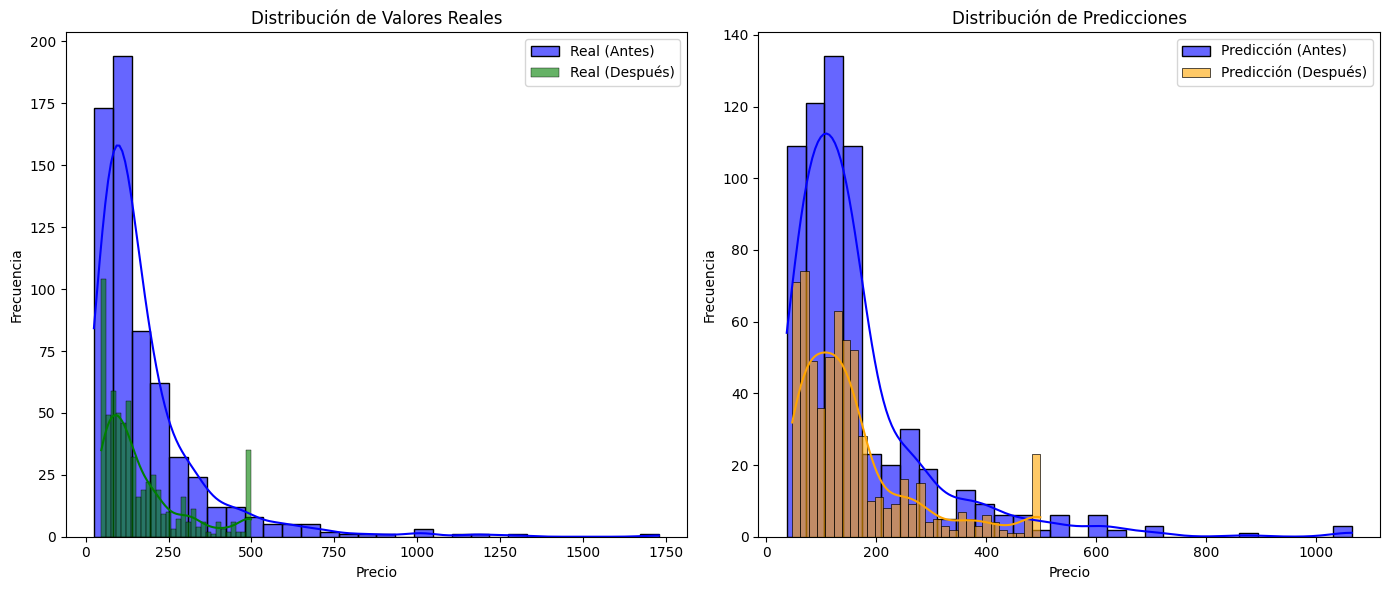

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparación de la distribución antes y después del truncado
plt.figure(figsize=(14, 6))

# Distribución de valores reales antes y después del truncado
plt.subplot(1, 2, 1)
sns.histplot(y_test_real, kde=True, color="blue", label="Real (Antes)", alpha=0.6, bins=30)
sns.histplot(truncated_y_test_real, kde=True, color="green", label="Real (Después)", alpha=0.6, bins=30)
plt.title("Distribución de Valores Reales")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.legend()

# Distribución de predicciones antes y después del truncado
plt.subplot(1, 2, 2)
sns.histplot(y_pred_real, kde=True, color="blue", label="Predicción (Antes)", alpha=0.6, bins=30)
sns.histplot(truncated_y_pred_real, kde=True, color="orange", label="Predicción (Después)", alpha=0.6, bins=30)
plt.title("Distribución de Predicciones")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.legend()

plt.tight_layout()
plt.show()
